# Proyecto Final  
## Actividad 8   
### Objetivo general  
  Utilizar modelos de Machine Learning para resolver un problema de una industria o negocio.  
### Objetivos específicos  
  1. Retomar el trabajo realizado en la segunda pre entrega, sumando el trabajo con Machine Learning.  
  2. Modelar la situación como un problema de Machine Learning.  
  3. Entrenar modelos de Machine Learning.  
  4. Realizar ingeniería de atributos y normalización/estandarización de variables.  
  5. Seleccionar el modelo con mejor performance.  
### Requisitos base
  1. Abstracto con motivación y audiencia: Descripción de alto nivel de lo que motiva a analizar los datos elegidos y audiencia que se podría beneficiar de este análisis.  
  2. Preguntas/Problema que buscamos resolver: Si bien puede haber más de una problemática a resolver, la problemática principal debe encuadrarse como un problema de clasificación o regresión.  
  3. Breve Análisis Exploratorio de Datos (EDA): Análisis descriptivo de los datos mediante visualizaciones y herramientas estadísticas, análisis de valores faltantes.  
  4. Ingeniería de atributos: Creación de nuevas variables, transformación de variables existentes (i.e normalización de variables, encoding, etc.).  
  5. Entrenamiento y Testeo: Entrenamiento y testeo de al menos 2 modelos distintos de Machine Learning utilizando algún método de validación cruzada.  
  6. Optimización: Utilizar alguna técnica de optimización de hiperparámetros (e.g gridsearch, randomizedsearch, etc.).  
  7. Selección de modelos: utilizar las métricas apropiadas para la selección del mejor modelo (e.g AUC, MSE, etc.).  

# Desarrollo

## Planteamiento
El presente proyecto se va a desarrollar de la siguiente manera:  
1. Breve descripción del dataset escogido.  
2. Preguntas/Problema que buscamos resolver:  
    - Definición de objetivo  
    - Contexto comercial  
    - Problema Comercial  
    - Contexto analítico  
    - Exploración de datos (EDA)  
3. Análisis Exploratorio de Datos (EDA).  
4. Limpieza de datos (nulos y outliers).
5. Aplicación de modelo de machine learning para dar solución a la problemática.  
6. Conclusiones finales.

## Planificación
asdasd
T  

### Diseño  
L 


Organizar despues: 

Lenguaje supervisado (se tiene X y Y) -> Clasificación (se desea una categoría) -> Customer retention 

Primera linea: OLS Regression → score~genre - score~producer -  score~studios

Segunda linea: PCA

## Desarrollo técnico

In [353]:
#Inicialización
import warnings
import pandas as pd
import math

import matplotlib as m
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly as pl

from fancyimpute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

### 1. Dataset escogido 

#### Dataset escogido: Anime Recommendation Database 2020
Contiene información de 17.562 series de animación japonesa y la opinión de 325.772 usuarios.  
35 Columnas - Más de 17.6K filas.  
URL: https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020

##### Análisis superficial.
Se considera que las siguientes columnas son potencialmente interesantes para el manejo y análisis de datos del dataset escogido:  
- **Name** El nombre de el anime a analizar. Será el identificador principal.  
- **Score** El puntaje recibido por los usuarios en total. Permite ver la apreciación del público.  
- **Genres** Género al que pertenece el personaje. Permite hacer un análisis de popularidad a partir del género.  
- **Type** El tipo de anime. Permite ver si el lugar donde se presenta influye en la popularidad y puntaje.  
- **Episodes** La cantidad de episodios. Permite analizar si la cantidad de episodios es o no una característica importante para el puntaje.    
- **Studios** Los estudios que realizaron el anime. Permite analizar la popularidad a partir del estudio que lo produjo.  
- **Producers** Los productores que realizaron el anime. Permite analizar la popularidad a partir del productor que lo produjo.  
- **Duration** La duración total. Permite analizar si el tiempo de duración es una variable importante para el puntaje.  
- **Popularity** La popularidad del anime.  
- **Ranked** La posición en la que se encuentra. Permite analizar la popularidad.  
  
Otras variables potencialmente relevantes son:  
 - **Favourites** El número de usuarios que colocó el anime en favoritos.  
 - **Watching** El número de usuarios que colocó el anime en actualmente viendo.  
 - **Completed** El número de usuarios que colocó el anime en completados.  
 - **On-Hold** El número de usuarios que colocó el anime en suspendido.  
 - **Dropped** El número de usuarios que colocó el anime en dejado. 

### 2. Problemática

#### Definición de Objetivo 
El análisis exploratorio de datos es necesario para cualquier proceso de valoración de los datos a la hora de leer e interpretar la información entregada. Resulta imperativo no solo saber distribuir los datos, sino interpretarlos creando relaciones entre sí que a simple vista no es posible visualizar. Esto expande la información que puede ser extraída y permite un campo de trabajo con los datos más extenso del esperado. Se va a presentar un caso de caracter práctica con el fin de demostrar el alcance de una adecuada exploración de datos para tomar las mejores decisiones de acuerdo a un banco de datos en bruto. Se explorará un caso imaginario basado en datos reales suministrados por internet y usando tecnologías asociadas a la estadística en el entorno de trabajo ofrecido por Python.  
  
#### Contexto Comercial
Usted se encuentra trabajando en el departamento de marketing, en el equipo de analistas, de una empresa que ofrece como actividad comercial principal una plataforma para la visualización de anime. Debido a una disminución de tráfico en la plataforma, los directivos han decidido prestar especial atención al alcance y recepción de la plataforma para solventar esta crisis. Debido a esto, el departamento de diseño ha decidido hacer una reconstrucción visual completa para atraer a las nuevas generaciones y el jefe del departamento le ha pedido a tu equipo un análisis detallado del contenido de la plataforma y su relación con el usuario final. 
El jefe solicitó la viabilidad a partir del puntaje de cada anime lo siguiente:  
- Colocar en la primera linea una exposición por género, productor y estudio.  
- Colocar en la segunda linea lo más atrayente para el usuario final basado en duración, fuente, tipo y compromiso para llegar al final.  
  
#### Problema Comercial
Su tarea principal es explorar los datos, identificar la mejor relación entre el score final y las variables de género, productor, estudio, duración, fuente, tipo y compromiso para llegar al final, para luego presentar la mejor propuesta para la exposición de dichas categorías en la primera y segunda linea de la plataforma.  

#### Contexto Analítico 
Usando un conjunto de datos relativamente reciente, te dispones a iniciar el proceso de análisis. Debido a que recibiste ordenes directas del jefe de departamento, te encuentras limitado a solo lo que solicitó.  

El conjunto de datos a trabajar contiene datos estructurados muy generales. Te dispones a realizar un proceso EDA de la siguiente manera:  
  
Para la primera linea.  
Se va a sacar el promedio de puntaje por variable categórica. Se va a tomar el score del anime y se va a aplicar como valor para cada variable categórica que contenga dicho ánime. Una vez hecho esto, se va a analizar el comportamiento que tiene el puntaje en relación a la variable categórica asociada.   
Esto se va a realizar de la misma forma para género (genre), productores (producers) y estudios (studios).  
  
Para la segunda linea.   
Para interpretar correctamente la relación de duración, se va a evaluar la relación que existe entre:  
- Duración vs Puntaje  
- Episodios vs Puntaje  
  
Para interpretar correctamente la relación de compromiso para finalizar, se va a evaluar la relación que existe entre:   
- Duración vs Detenido   
- Duración vs Abandonado   
- Episodios vs Detenido   
- Episodios vs Abandonado   
- Duración vs Completado   
- Episodios vs Completado  

### 3. Análisis Exploratorio de Datos (EDA).

In [165]:
#Lectura del archivo y confirmación de contenido
tabla=pd.read_csv('anime.csv',sep=',',encoding='utf-8')
tabla.head(2)

MAL_ID                             Name Score  \
0       1                     Cowboy Bebop  8.78   
1       5  Cowboy Bebop: Tengoku no Tobira  8.39   

                                            Genres            English name  \
0  Action, Adventure, Comedy, Drama, Sci-Fi, Space            Cowboy Bebop   
1            Action, Drama, Mystery, Sci-Fi, Space  Cowboy Bebop:The Movie   

    Japanese name   Type Episodes                        Aired    Premiered  \
0       カウボーイビバップ     TV       26  Apr 3, 1998 to Apr 24, 1999  Spring 1998   
1  カウボーイビバップ 天国の扉  Movie        1                  Sep 1, 2001      Unknown   

   ...  Score-10   Score-9   Score-8  Score-7  Score-6 Score-5 Score-4  \
0  ...  229170.0  182126.0  131625.0  62330.0  20688.0  8904.0  3184.0   
1  ...   30043.0   49201.0   49505.0  22632.0   5805.0  1877.0   577.0   

   Score-3  Score-2  Score-1  
0   1357.0    741.0   1580.0  
1    221.0    109.0    379.0  

[2 rows x 35 columns]

#### Primera linea

Proceso a seguir:
- Tomar el score del anime y se va a aplicar como valor para cada variable categórica que contenga dicho ánime.  
- Analizar el comportamiento de la calificación según la variable categórica específica.   

Esto se va a realizar de la misma forma para género (genre), productores (producers) y estudios (studios). Se escogerá el que mayor score contenga.

In [166]:
#Extrayendo las columnas que nos interesan
tablaPrimeraLinea = tabla[['Score','Genres','Producers','Studios']].copy()
tablaPrimeraLinea.head(2)

Score                                           Genres  \
0  8.78  Action, Adventure, Comedy, Drama, Sci-Fi, Space   
1  8.39            Action, Drama, Mystery, Sci-Fi, Space   

                Producers  Studios  
0           Bandai Visual  Sunrise  
1  Sunrise, Bandai Visual    Bones

In [167]:
warnings.filterwarnings("ignore")
#Limpieza de datos
#Se trabajará con dataframe para almacenar los datos de interés para las tres categorías
genredf = pd.DataFrame(columns=['Genre', 'Score'])
producerdf = pd.DataFrame(columns=['Producer', 'Score'])
studiodf = pd.DataFrame(columns=['Studio', 'Score'])

#Para cada uno de los registros
for i in range(len(tablaPrimeraLinea)):
#for i in range(10):
    #Temporales para mejor compresion
    studioI=tablaPrimeraLinea['Studios'][i] #Estudios del registro
    generoI=tablaPrimeraLinea['Genres'][i] #Generos del registro
    productorI = tablaPrimeraLinea['Producers'][i] #Productores del registro
    scoreI=tablaPrimeraLinea['Score'][i] #Score del registro
    
    #Productores
    #Deconstruimos si es necesario entre los que se encuentren
    prodTemp = productorI.split(",")
    for j in range(len(prodTemp)): prodTemp[j]=prodTemp[j].strip() #Se eliminan vacios

    for prod in prodTemp: #Por cada productor del registro
        if scoreI != 'Unknown' and prod != 'Unknown': #Si hay desconocidos o vacios, los descartamos porque no podemos trabajar con esa información. 
            producerdf = pd.concat([producerdf, pd.DataFrame([{'Producer' : prod , 'Score' : float(scoreI)}])], ignore_index=True)

    #Genero
    #Deconstruimos si es necesario entre los que se encuentren
    genTemp = generoI.split(",")
    for j in range(len(genTemp)): genTemp[j]=genTemp[j].strip() #Se eliminan vacios

    for gen in genTemp: #Por cada productor del registro
        if scoreI != 'Unknown' and gen != 'Unknown': #Si hay desconocidos o vacios, los descartamos porque no podemos trabajar con esa información. 
            genredf = pd.concat([genredf, pd.DataFrame([{'Genre' : gen , 'Score' : float(scoreI)}])], ignore_index=True)

    #Estudios
    #Deconstruimos si es necesario entre los que se encuentren
    stuTemp = studioI.split(",")
    for j in range(len(stuTemp)): stuTemp[j]=stuTemp[j].strip() #Se eliminan vacios

    for stu in stuTemp: #Por cada productor del registro
        if scoreI != 'Unknown' and stu != 'Unknown': #Si hay desconocidos o vacios, los descartamos porque no podemos trabajar con esa información. 
            studiodf = pd.concat([studiodf, pd.DataFrame([{'Studio' : stu , 'Score' : float(scoreI)}])], ignore_index=True)

Se hizo una limpieza de datos donde se despreciaron los datos desconocidos ya que no será posible trabajar con ellos.  
Una vez hecha la limpieza y adecuación de dataframe, vamos a visualizar la información. 

In [168]:
#Productores
len(producerdf['Producer'].unique())

1208

Inicialmente se pueden observar 1208 productores.  
No será posible hacer una comparativa de todos, así que solo se va a hacer una comparativa de aquellos 30 con mayores puntajes para tomar una decisión. 

<Axes: xlabel='Producer'>

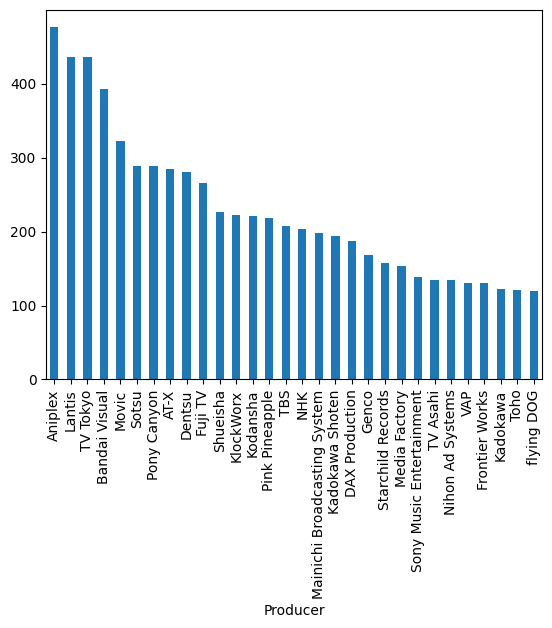

In [169]:
producerdf["Producer"].value_counts()[0:30].plot(kind='bar')

En relación a los productores, se puede visualizar a primera vista que hay una inclinación marcada a los primeros 5 productores y luego los siguientes 5. No hay tanta variabilidad. A simple vista, se podría decir que colocar a los 5 productores mejor calificados sería adecuado para captar la atención, pero esto también podría generar que muchos usuarios descarten la primera linea por ver a productores tan conocidos sin tener en cuenta otros detalles.  
No es concluyente. 

In [170]:
# Géneros
len(genredf['Genre'].unique())

43

<Axes: xlabel='Genre'>

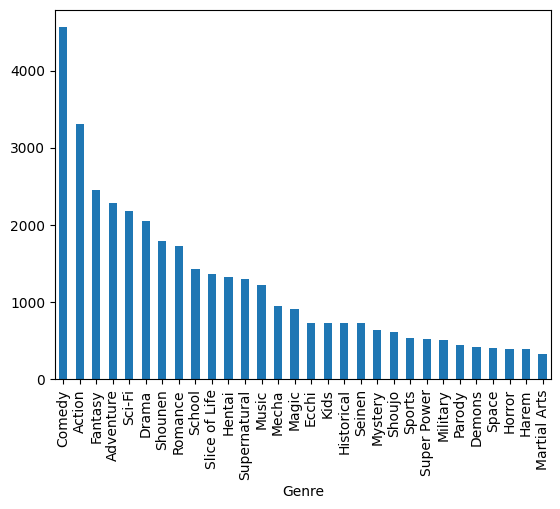

In [171]:
#Hay inicialmente 43 productores.  
#No será posible hacer una comparativa de todos, así que solo se va a hacer una comparativa de aquellos 30 con mayores puntajes para tomar una decisión. 
genredf["Genre"].value_counts()[0:30].plot(kind='bar')

En relación a los géneros, se puede visualizar una clara inclinación hacia los géneros de comedia (Comedy) y acción (Action). Si se colocan únicamente estos dos géneros en la primera linea, contrario a captar mejor la atención, va a monopolizar la sección y podría llegar a ser menos considerado a la hora de tomar una decisión para ver anime.   
Lo más adecuado sería tomar los animes con mejores calificaciones que hagan parte de los siguientes 10 géneros mejor calificados, pero que incluyan los géneros de comedia (Comedy) y acción (Action) entre sus subgéneros. Sin embargo, no hay forma de asegurar la viabilidad de esto. 

In [172]:
#### Estudios
len(studiodf['Studio'].unique())

624

<Axes: xlabel='Studio'>

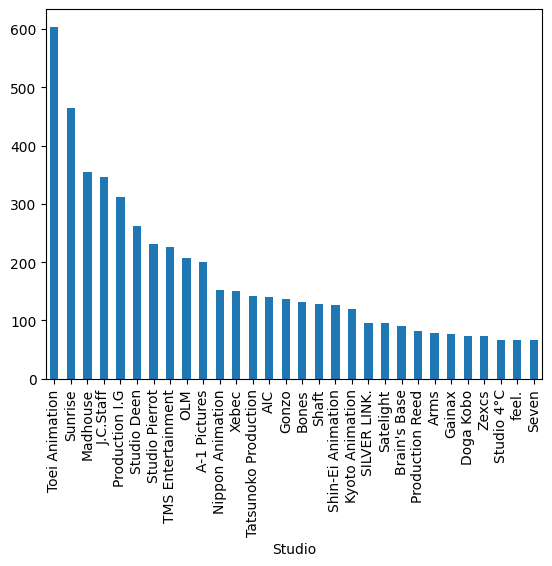

In [173]:
#Hay inicialmente 624 estudios.  
#No será posible hacer una comparativa de todos, así que solo se va a hacer una comparativa de aquellos 30 con mayores puntajes para tomar una decisión. 
studiodf["Studio"].value_counts()[0:30].plot(kind='bar')

En relación a los estudios, tiene un comportamiento similar al de los géneros. De la misma forma, ver el mismo estudio podría desmotivar al usuario de escoger un anime a ver. Es probable que el usuario ya conozca de antemano el estudio y sus productos, lo que dificultaría su labor de encontrar algo distinto que ver. Sin embargo, no hay información que respalde esta teoria. 

**Conclusión:** Ha sido posible visualizar aquello que es más agradable para una mejor calificación en cuanto a estudios, productores y estudios, pero son datos superficiales. La conclusión a la que podemos llegar es que no es posible tomar una decisión a partir de la información presentada aquí, se necesita mayor detalle en cuanto al comportamiento de los usuarios más allá de los puntajes. 

#### Segunda linea

Para interpretar correctamente la relación de duración, se va a evaluar la relación que existe entre:  
- Duración vs Puntaje  
- Episodios vs Puntaje  
  
Para interpretar correctamente la relación de compromiso para finalizar, se va a evaluar la relación que existe entre:   
- Duración vs Detenido  
- Duración vs Abandonado   
- Episodios vs Detenido  
- Episodios vs Abandonado  
- Duración vs Completado  
- Episodios vs Completado

In [174]:
#Extrayendo las columnas que nos interesan
tablaSegundaLinea = tabla[['Score','Duration','Episodes','On-Hold','Dropped','Completed']].copy()
tablaSegundaLinea.head(2)

Score         Duration Episodes  On-Hold  Dropped  Completed
0  8.78  24 min. per ep.       26    71513    26678     718161
1  8.39    1 hr. 55 min.        1     1935      770     208333

In [175]:
#Limpieza de datos
#Dataframe con la data limpia
dataSecond= pd.DataFrame(columns=['Score','Duration','Episodes','On-Hold','Dropped','Completed'])

for i in range(len(tablaSegundaLinea)): #Por cada registro
#for i in range(10):
    if tablaSegundaLinea['Duration'][i] != 'Unknown' and tablaSegundaLinea['Score'][i] != 'Unknown' and tablaSegundaLinea['Episodes'][i] != 'Unknown': #Si hay desconocidos o vacios, los descartamos porque no podemos trabajar con esa información. 
        dur = tablaSegundaLinea['Duration'][i].split(" ") #Se toma la duración de la fila
        duration = 0 #Variable para colocar la duración en minutos
        #Hay varios casos aquí: 
        #1 Cuando es en segundos "x sec."
        #2 Cuando es en segundos por episodios "x sec. per ep."
        #3 Cuando es en minutos "x min."
        #4 Cuando es en minutos por episodios "x min. per ep."
        #5 Cuando es en horas "x hr."
        #6 Cuando es en horas y minutos "x hr. x min."

        if dur[1] == "sec.": #Si es por segundos
            duration = float(dur[0]) / 60 #Se divide el valor en 60 para volverlo minutos. 
            #Queda validado caso 1
        elif dur[1] == "min.": #Sino, se valida si es por minutos
            duration = float(dur[0]) #Se deja el valor en minutos
            #Queda validado caso 3
        else: #Sino, es por horas
            duration = float(dur[0]) * 60 #Se multiplica el valor por 60 para volverlo minutos
            #Queda validado caso 5

        if len(dur) > 2: #Si el tamaño es mayor a 2, es porque es una duración compuesta
            if dur[-1] == "ep.": #Si se divide por episodios, se validan casos 2 y 4
                duration = duration * float(tablaSegundaLinea['Episodes'][i]) #Se multiplica por la cantidad de episodios
                #Quedan validados casos 2 y 4
            elif dur[-1] == "min.": #Si se divide en horas y minutos, se valida caso 6
                duration = duration + float(dur[2]) #Se suman los minutos
        #Se agrega al datadrame        
        dataSecond = pd.concat([dataSecond, pd.DataFrame([{'Score':float(tablaSegundaLinea['Score'][i]),'Duration':duration,
                                                       'Episodes':int(tablaSegundaLinea['Episodes'][i]),'On-Hold':int(tablaSegundaLinea['On-Hold'][i]),
                                                       'Dropped':int(tablaSegundaLinea['Dropped'][i]),'Completed':int(tablaSegundaLinea['Completed'][i])}])], ignore_index=True)



In [176]:
#Se confirma tabla
dataSecond.head(2)

Score  Duration Episodes On-Hold Dropped Completed
0   8.78     624.0       26   71513   26678    718161
1   8.39     115.0        1    1935     770    208333

In [177]:
#Dataframe para graficar según la duración
dataDuration = dataSecond.sort_values(by = 'Duration').copy()

#Dataframe para graficar según la cantidad de episodios
dataEpisodes = dataSecond.sort_values(by = 'Episodes', ignore_index=True).copy()

#Ahora vamos a darle un vistazo a las relaciones entre las distintas variables. 

##### Relación de duración

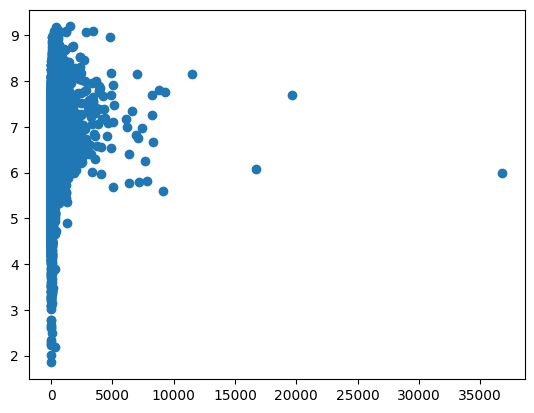

In [178]:
plt.scatter(dataDuration['Duration'], dataDuration['Score'])

Con respecto a la relación de duración y puntaje, no es posible observar una relación decisiva. Aparentemente, hay mayor interés en los animes con poca duración.  
Se necesita más detalle. 

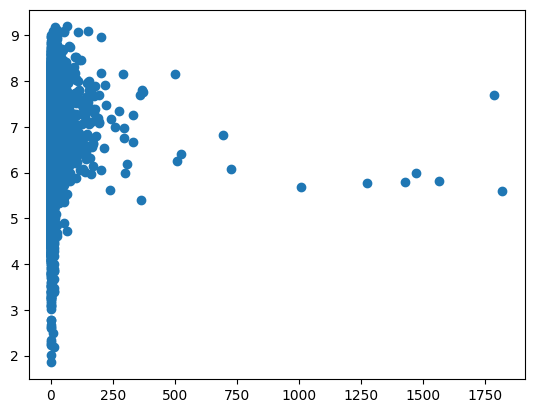

In [179]:
plt.scatter(dataEpisodes['Episodes'], dataEpisodes['Score'])

Con respecto a la relación de la cantidad de episodios y puntaje, no es posible observar una relación decisiva. Se repite el mismo comportamiento anterior.  
Se necesita más detalle. 

En ambos casos se mostró una tendencia hacia los animes de menor duración, pero resulta necesario mayor certeza. No es posible llegar a una conclusión solo con esta información. 

##### Relación de compromiso

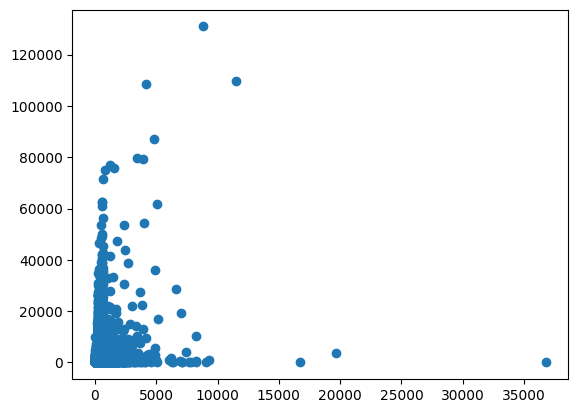

In [180]:
plt.scatter(dataDuration['Duration'], dataDuration['On-Hold'])

Con respecto a la relación de duración y detenido, no es posible observar una relación decisiva. Se puede observar una tendencia a detener los animes alrededor de cierto rango de duración, pero es inconcluso.  
Se necesita más detalle. 

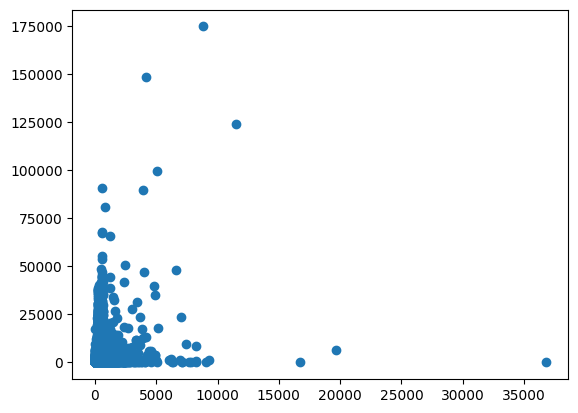

In [181]:
plt.scatter(dataDuration['Duration'], dataDuration['Dropped'])

Con respecto a la relación de duración y abandono, no es posible observar una relación decisiva. Es posible observar que existe una tendencia alrededor de cierto rango de duración al ser abandonado. Es posible que esto se deba a la tolerancia del usuario para esperar un contenido interesante antes de cierto tiempo. Esta información puede ser constructiva más adelante.  
Se necesita más detalle. 

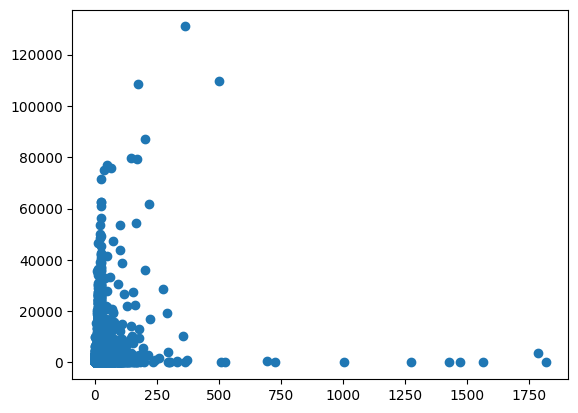

In [182]:
plt.scatter(dataEpisodes['Episodes'], dataEpisodes['On-Hold'])

Con respecto a la relación de la cantidad de episodios y detenido, no es posible observar una relación decisiva. La misma tendencia anterior se puede observar aquí.    
Se necesita más detalle. 

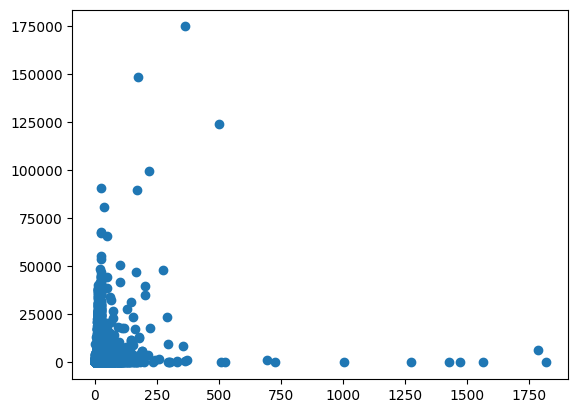

In [183]:
plt.scatter(dataEpisodes['Episodes'], dataEpisodes['Dropped'])

Con respecto a la relación de la cantidad de episodios y abandono, no es posible observar una relación decisiva. Se puede observar el mismo comportamiento visto anteriormente.   
Se necesita más detalle. 

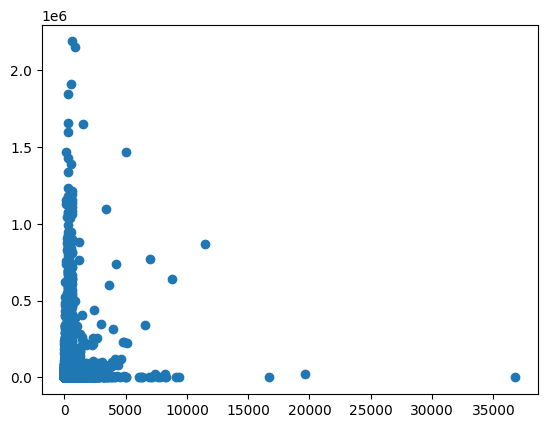

In [184]:
plt.scatter(dataDuration['Duration'], dataDuration['Completed'])

Con respecto a la relación de duración y completado, no es posible observar una relación decisiva. Si bien muestra una tendencia similar a las vistas anteriormente, aquí se puede ver que hay una fuerte tendencia a completar aquellos animes de menor duración. También se encuentran rangos de apreciación muy similares a los rangos de depreciación vistos en gráficas anteriores. Este comportamiento es contradictorio.    
Se necesita más detalle. 

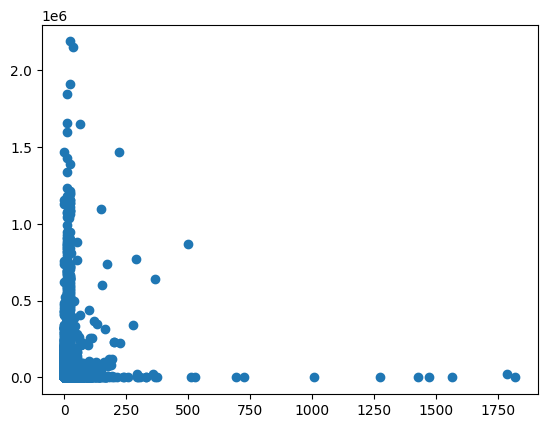

In [185]:
plt.scatter(dataEpisodes['Episodes'], dataEpisodes['Completed'])

Con respecto a la relación de la cantidad de episodios y completado, no es posible observar una relación decisiva. Al igual que la gráfica anterior, se encuentra un comportamiento similar que resulta contradictorio con lo revisado. Hace falta mayor estudio del caso para llegar a una conclusión.    
Se necesita más detalle. 

**Conclusión:**   
Con respecto a la primera linea, se necesita mayor exploración para tomar una decisión sobre cuál sería la categoría más adecuada para mostrar en la plataforma. Es necesario tomar en cuentas más variables y establecer un modelo.   
Con respecto a la segunda linea, Ha sido posible observar un comportamiento similar en las gráficas presentadas, demostrando una tendencia tanto a la depreciación (ya sea abandono o detención) como de apreciación (de completitud) en rangos específicos de duración y cantidad de episodios. Es posible observar que el usuario tiene cierta tolerancia hasta cierta duración y cantidad de episodios en un rango específico para decidir si continua viendo un anime o lo abandona, siendo que lo completa si está dentro del rango. Si se tiene en cuenta que el rango es congruente en ambos casos, es posible concluir que aquellos son rangos de mayor interés para recomendar animes en la plataforma. 

### 4. Limpieza de datos

Se planea hacer una limpieza de datos usando la siguiente secuencia:  
    1. Se buscarán valores nulos  
    2. Se verificará el porcentaje de valores nulos.  
    3. Si la cantidad de valores nulos no es significativo, se descartarán dichos datos. Sino, se tratarán de llenar con algún método conocido.  
    4. Una vez tratados los nulos, se tratarán los outliers. 
 
Los datos de interés para los futuros modelos serán los siguientes:  
Primera linea, variables con interés relacionadas a la retención del usuario:  
    - Score: Variable de interés principal  
    - Genres: Variable de comparación  
    - Producers: Variable de comparación  
    - Studios: Variable de comparación  
    - Ranked: Variable relevante  
    - Popularity: Variable relevante  
    - Rating: Variable relevante  
    - Favorites: Variable relevante  
    - Type: Variable relevante  
      
Segunda linea, variables con interés a la fidelidad del usuario y el tiempo dedicado:  
    - Score: Variable relevante  
    - Duration: Variable relevante  
    - Episodes: Variable relevante  
    - Watching: Variable relevante  
    - Completed: Variable relevante  
    - On-Hold: Variable relevante  
    - Dropped: Variable relevante  


In [186]:
#Lectura del archivo y confirmación de contenido

tabla=pd.read_csv('anime.csv',sep=',',encoding='utf-8')
tabla.head(2)

MAL_ID                             Name Score  \
0       1                     Cowboy Bebop  8.78   
1       5  Cowboy Bebop: Tengoku no Tobira  8.39   

                                            Genres            English name  \
0  Action, Adventure, Comedy, Drama, Sci-Fi, Space            Cowboy Bebop   
1            Action, Drama, Mystery, Sci-Fi, Space  Cowboy Bebop:The Movie   

    Japanese name   Type Episodes                        Aired    Premiered  \
0       カウボーイビバップ     TV       26  Apr 3, 1998 to Apr 24, 1999  Spring 1998   
1  カウボーイビバップ 天国の扉  Movie        1                  Sep 1, 2001      Unknown   

   ...  Score-10   Score-9   Score-8  Score-7  Score-6 Score-5 Score-4  \
0  ...  229170.0  182126.0  131625.0  62330.0  20688.0  8904.0  3184.0   
1  ...   30043.0   49201.0   49505.0  22632.0   5805.0  1877.0   577.0   

   Score-3  Score-2  Score-1  
0   1357.0    741.0   1580.0  
1    221.0    109.0    379.0  

[2 rows x 35 columns]

In [187]:
#Separación de los datos de interés 
data1 = tabla[['Name','Score', 'Genres', 'Producers', 'Studios','Ranked','Popularity','Rating','Favorites','Type']].copy()
data2 = tabla[['Name','Score', 'Duration', 'Episodes', 'Watching','Completed','On-Hold','Dropped']].copy()

In [188]:
warnings.filterwarnings("ignore")
#Primera linea 
#Pasando de lista separada por comas a listas estructuradas
def deconstruir(line): #Linea base
  if (line == 'Unknown'): #Si es desconocido se deja igual. 
      return 'Unknown'
  else:
    temp = line.split(",") #Se separa en una lista separada por comas
    return temp

#Procesando
for i in range(len(data1)): #por cada fila
  data1['Genres'][i] = deconstruir(data1['Genres'][i])
  data1['Producers'][i] = deconstruir(data1['Producers'][i])
  data1['Studios'][i] = deconstruir(data1['Studios'][i])

In [189]:
warnings.filterwarnings("ignore")
#Segunda linea
#Método para procesar el tiempo de duración a float
def procesarDateToFloat(line, episodes): #Se recibe la linea base a procesar y la cantidad de episodios
  if (line == 'Unknown'): #Si es desconocido, se deja igual. 
      return 'Unknown'
  else:
      if (episodes == 'Unknown'): #Si no se sabe cuantos episodios tuvo
          epis = 0 #Se asume que tuvo al menos uno
      else: #Sino 
          epis = int(episodes) #Se usa el número de episodios
      #Deconstruimos si es necesario entre los que se encuentren
      dur = line.split(" ")
      duration = 0 #Variable para colocar la duración en minutos
            #Hay varios casos aquí: 
            #1 Cuando es en segundos "x sec."
            #2 Cuando es en segundos por episodios "x sec. per ep."
            #3 Cuando es en minutos "x min."
            #4 Cuando es en minutos por episodios "x min. per ep."
            #5 Cuando es en horas "x hr."
            #6 Cuando es en horas y minutos "x hr. x min."

      if dur[1] == "sec.": #Si es por segundos
            duration = float(dur[0]) / 60 #Se divide el valor en 60 para volverlo minutos. 
            #Queda validado caso 1
      elif dur[1] == "min.": #Sino, se valida si es por minutos
            duration = float(dur[0]) #Se deja el valor en minutos
            #Queda validado caso 3
      else: #Sino, es por horas
            duration = float(dur[0]) * 60 #Se multiplica el valor por 60 para volverlo minutos
            #Queda validado caso 5

      if len(dur) > 2: #Si el tamaño es mayor a 2, es porque es una duración compuesta
            if dur[-1] == "ep.": #Si se divide por episodios, se validan casos 2 y 4
                  duration = duration * epis #Se multiplica por la cantidad de episodios
                  #Quedan validados casos 2 y 4
            elif dur[-1] == "min.": #Si se divide en horas y minutos, se valida caso 6
                  duration = duration + float(dur[2]) #Se suman los minutos
      return duration
  
for i in range(len(data2)): #Por cada fila
     data2['Duration'][i] = procesarDateToFloat(data2['Duration'][i], data2['Episodes'][i])

Para la primera linea: Ahora se tienen los valores categoricos en una lista estructurada para trabajar mejor.  
Para la segunda linea: Ahora se tiene la duración total del anime en minutos. 

#### Nulos

In [190]:
#Se verifica que no tenga nulos
print('Primera linea:')
print(data1.isnull().sum())
print('Segunda linea:')
print(data2.isnull().sum())

Primera linea:
Name          0
Score         0
Genres        0
Producers     0
Studios       0
Ranked        0
Popularity    0
Rating        0
Favorites     0
Type          0
dtype: int64
Segunda linea:
Name         0
Score        0
Duration     0
Episodes     0
Watching     0
Completed    0
On-Hold      0
Dropped      0
dtype: int64


Sin embargo, gracias al análisis exploratorio de datos, se sabe que no hay valores nulos, pero si se encuentran valores "unknown". En el caso actual, serian equivalentes. Por lo tanto, hay que trabajar los datos unknown. 

In [191]:
nulos = data1.apply(lambda row: row.astype(str).str.contains('Unknown').any(), axis=1).sum()
print('Cantidad de filas que presentan nulos: '+str(nulos))
print('Porcentaje de filas que presentan nulos:')
print((nulos/len(data1))*100)

Cantidad de filas que presentan nulos: 12190
Porcentaje de filas que presentan nulos:
69.41122878943172


In [192]:
nulos = data2.apply(lambda row: row.astype(str).str.contains('Unknown').any(), axis=1).sum()
print('Cantidad de filas que presentan nulos: '+str(nulos))
print('Porcentaje de filas que presentan nulos:')
print((nulos/len(data1))*100)

Cantidad de filas que presentan nulos: 5266
Porcentaje de filas que presentan nulos:
29.985195308051477


En ambos casos es un porcentaje considerable, por lo que no es bueno perder tanta información.  
Se procede a reemplazar los datos.  
Se escogido **la imputación multiple o predictiva** porque son demasiados nulos. Los datos serán sometidos ambos a los métodos de Knn imputation y Mice Imputation.   

¿Donde se encuentran exactamente estos nulos disfrazados de Unknown? 

In [193]:
null = {} #Se crea diccionario para almacenar los unknowns
for i in data1.columns: #Por cada columna
    null[i] = int((data1[i].values == 'Unknown').sum()) #Se obtiene la cantidad de Unknowns
print(null)

{'Name': 0, 'Score': 5141, 'Genres': 63, 'Producers': 7794, 'Studios': 7079, 'Ranked': 1762, 'Popularity': 0, 'Rating': 688, 'Favorites': 0, 'Type': 37}


In [194]:
null = {} #Se crea diccionario para almacenar los unknowns
for i in data2.columns: #Por cada columna
    null[i] = int((data2[i].values == 'Unknown').sum()) #Se obtiene la cantidad de Unknowns
print(null)

{'Name': 0, 'Score': 5141, 'Duration': 555, 'Episodes': 516, 'Watching': 0, 'Completed': 0, 'On-Hold': 0, 'Dropped': 0}


##### Segunda linea

Para la segunda linea se va a tomar los valores 'Unknown' y volvernos valores nulos para poder trabajar adecuadamente con ellos. 

In [195]:
for i in data1.columns: #Por cada columna
    data1[i] = data1[i].apply(lambda x: x if x != 'Unknown' else np.nan) #Se cambia los valores Unknown por NaN

In [196]:
for i in data2.columns: #Por cada columna
    data2[i] = data2[i].apply(lambda x: x if (x != 'Unknown') else np.nan) #Se cambia los valores Unknown por NaN
    data2[i] = data2[i].apply(lambda x: x if (x != 0) else np.nan) #Se cambia los valores 0 por NaN

In [197]:
data1.isnull().sum() #Ver los nulos de las filas

Name             0
Score         5141
Genres          63
Producers     7794
Studios       7079
Ranked        1762
Popularity       0
Rating         688
Favorites        0
Type            37
dtype: int64

In [198]:
data2.isnull().sum() #Ver los nulos de las filas

Name            0
Score        5141
Duration      555
Episodes      516
Watching      357
Completed     531
On-Hold       871
Dropped       376
dtype: int64

Ahora si podemos trabajar con valores nulos. 

Text(0.5, 1.0, 'Modificacion')

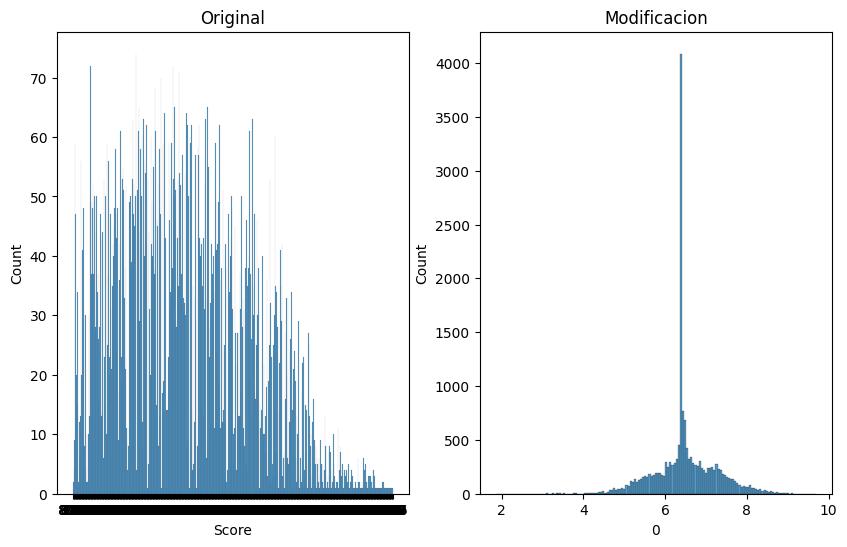

In [199]:
#Imputación multiple para la segunda linea
mice_impute = IterativeImputer()
data2fill = mice_impute.fit_transform(data2[['Score','Duration','Episodes','Watching','Completed','On-Hold','Dropped']])
data2fillDF= pd.DataFrame(data2fill)

# Verificar si cambiamos distribucion
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.histplot(data2['Score'])
plt.title('Original')
plt.subplot(122)
sns.histplot(data2fillDF[0])
plt.title('Modificacion')

Es muy diferente la distribución. Este llenado no es viable. 

Probemos ahora con imputación multiple KNN

Text(0.5, 1.0, 'Modificacion')

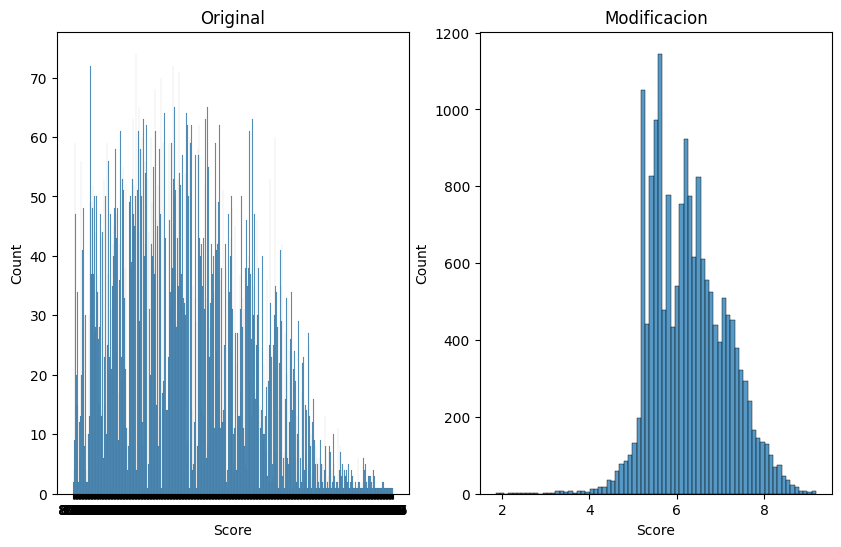

In [200]:
imputer = KNNImputer(n_neighbors= 3).set_output(transform='pandas')
data2f = imputer.fit_transform(data2.drop('Name', axis=1))

# Verificar si cambiamos distribucion
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.histplot(data2['Score'])
plt.title('Original')
plt.subplot(122)
sns.histplot(data2f['Score'])
plt.title('Modificacion')

Es más coherente que el anterior. 

In [201]:
data2f['Name'] = data2['Name'] #Se agrega la columna de nombres

In [202]:
#Se elimina la parte entera de aquellas categorías que así lo requieran
for i in range(len(data2f)):
    data2f['Duration'][i]=math.trunc(data2f['Duration'][i])
    data2f['Episodes'][i]=math.trunc(data2f['Episodes'][i])
    data2f['Completed'][i]=math.trunc(data2f['Completed'][i])
    data2f['Dropped'][i]=math.trunc(data2f['Dropped'][i])
    data2f['On-Hold'][i]=math.trunc(data2f['On-Hold'][i])
    data2f['Watching'][i]=math.trunc(data2f['Watching'][i])

In [203]:
#Se confirma que los datos estén llenos
data2f.tail(4)

Score  Duration  Episodes  Watching  Completed  On-Hold  Dropped  \
17558  5.676667    2140.0     425.0      14.0      132.0     14.0     57.0   
17559  5.993333      17.0       1.0       3.0       33.0      2.0     19.0   
17560  5.493333     130.0       4.0      13.0        2.0      2.0      1.0   
17561  6.563333       9.0       1.0       4.0       24.0      1.0      1.0   

                                  Name  
17558                     Mieruko-chan  
17559  Higurashi no Naku Koro ni Sotsu  
17560      Yama no Susume: Next Summit  
17561                    Scarlet Nexus

Ahora tenemos el dataframe de la segunda linea sin valores nulos. Listo para pasar a los Outliers

##### Primera linea

Para el caso de la primera linea, va a ser un poco distinto.  
Las columnas de **Genres, Producers y Studios** constan de estructuras de datos con los asociados a un anime. Por lo tanto, se va a expandir el dataframe para poder hacer una implantación multiple de los datos.  
El proceso será el siguiente:  
    1. Se llenarán los nulos de las categorías **Type, Rating y Ranked**  
    2. Se multiplicarán las filas por categorías **Genres, Producers y Studios**  
    3. Se hará la implantación multiple.  

In [204]:
print('Type')
print(data1['Type'].unique())
print('Rating')
print(data1['Rating'].unique())

Type
['TV' 'Movie' 'OVA' 'Special' 'ONA' 'Music' nan]
Rating
['R - 17+ (violence & profanity)' 'PG-13 - Teens 13 or older'
 'PG - Children' 'R+ - Mild Nudity' 'G - All Ages' 'Rx - Hentai' nan]


Se van a convertir las categorías **Type y Rating** a valores ordinales teniendo en cuenta la duración promedio del producto y la gravedad del contenido correspondientemente. 

In [205]:
for i in range(len(data1)):
    if data1['Rating'][i] == 'G - All Ages':
        data1['Rating'][i] = 0
    elif data1['Rating'][i] == 'PG - Children':
        data1['Rating'][i] = 1
    elif data1['Rating'][i] == 'PG-13 - Teens 13 or older':
        data1['Rating'][i] = 2
    elif data1['Rating'][i] == 'R - 17+ (violence & profanity)':
        data1['Rating'][i] = 3
    elif data1['Rating'][i] == 'R+ - Mild Nudity':
        data1['Rating'][i] = 4
    elif data1['Rating'][i] == 'Rx - Hentai':
        data1['Rating'][i] = 5
    else:
        data1['Rating'][i] = data1['Rating'][i]

In [206]:
for i in range(len(data1)):
    if data1['Type'][i] == 'Music':
        data1['Type'][i] = 0
    elif data1['Type'][i] == 'Special':
        data1['Type'][i] = 1
    elif data1['Type'][i] == 'OVA':
        data1['Type'][i] = 2
    elif data1['Type'][i] == 'Movie':
        data1['Type'][i] = 3
    elif data1['Type'][i] == 'ONA':
        data1['Type'][i] = 4
    elif data1['Type'][i] == 'TV':
        data1['Type'][i] = 5
    else:
        data1['Type'][i] = data1['Type'][i]

Ahora a llenar los nulos

Text(0.5, 1.0, 'Modificacion')

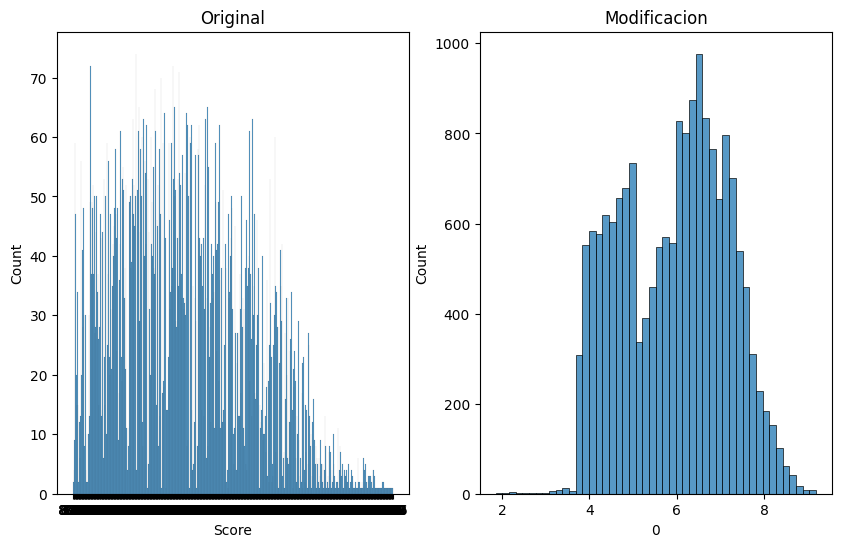

In [207]:
#Imputación multiple para la primera linea
mice_impute = IterativeImputer()
data1fill = mice_impute.fit_transform(data1[['Score','Ranked','Popularity','Rating','Favorites','Type']])
data1fillDF= pd.DataFrame(data1fill)

# Verificar si cambiamos distribucion
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.histplot(data1['Score'])
plt.title('Original')
plt.subplot(122)
sns.histplot(data1fillDF[0])
plt.title('Modificacion')

Text(0.5, 1.0, 'Modificacion')

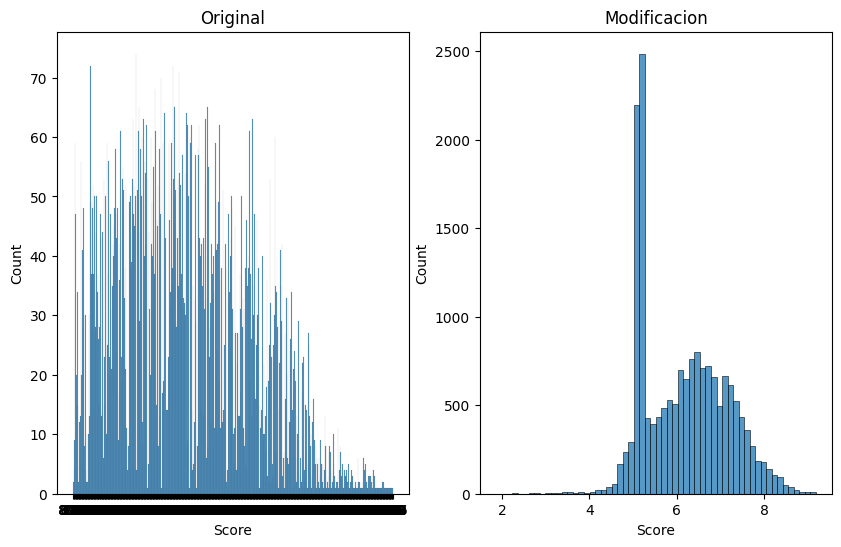

In [208]:
imputer = KNNImputer(n_neighbors= 3).set_output(transform='pandas')
data1f = imputer.fit_transform(data1.drop(['Name','Genres','Producers','Studios'], axis=1))

# Verificar si cambiamos distribucion
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.histplot(data1['Score'])
plt.title('Original')
plt.subplot(122)
sns.histplot(data1f['Score'])
plt.title('Modificacion')

En el caso de la primera linea, es mejor el método Mice.  

Preparamos el dataframe a usar. 

In [209]:
data1fillDF = data1fillDF.rename(columns={0: 'Score',1: 'Ranked',2: 'Popularity',3: 'Rating',4: 'Favorites',5: 'Type'})
data1fillDF.head(2)

Score  Ranked  Popularity  Rating  Favorites  Type
0   8.78    28.0        39.0     3.0    61971.0   5.0
1   8.39   159.0       518.0     3.0     1174.0   3.0

In [210]:
print('Rating')
print(data1fillDF['Rating'].value_counts().tail(5))
print('Type')
print(data1fillDF['Type'].value_counts().tail(5))

Rating
Rating
-0.181009    1
 0.116028    1
 0.733878    1
-0.181108    1
 0.856348    1
Name: count, dtype: int64
Type
Type
2.721141    1
2.102010    1
1.706397    1
2.681607    1
2.435614    1
Name: count, dtype: int64


In [211]:
#Eliminando los valores no enteros de Type y Ranting
#Adicionalmente se eliminan los valores decimales de Ranked, se repetirán posiciones
for i in range(len(data1fillDF)):
    data1fillDF['Rating'][i]=math.trunc(data1fillDF['Rating'][i])
    data1fillDF['Type'][i]=math.trunc(data1fillDF['Type'][i])
    data1fillDF['Ranked'][i]=math.trunc(data1fillDF['Ranked'][i])

In [212]:
#Confirmando que solo hayan valores no decimales
print('Rating')
print(data1fillDF['Rating'].value_counts())
print('Type')
print(data1fillDF['Type'].value_counts())

Rating
Rating
2.0    6229
0.0    6078
1.0    1752
5.0    1345
3.0    1161
4.0     997
Name: count, dtype: int64
Type
Type
5.0    4996
2.0    3912
3.0    3059
1.0    2219
4.0    1907
0.0    1469
Name: count, dtype: int64


In [213]:
#Fusionando dataframes
data1fillDF['Name'] = data1['Name']
data1fillDF['Genres'] = data1['Genres']
data1fillDF['Producers'] = data1['Producers']
data1fillDF['Studios'] = data1['Studios']
data1fillDF.head(2)

Score  Ranked  Popularity  Rating  Favorites  Type  \
0   8.78    28.0        39.0     3.0    61971.0   5.0   
1   8.39   159.0       518.0     3.0     1174.0   3.0   

                              Name  \
0                     Cowboy Bebop   
1  Cowboy Bebop: Tengoku no Tobira   

                                              Genres  \
0  [Action,  Adventure,  Comedy,  Drama,  Sci-Fi,...   
1        [Action,  Drama,  Mystery,  Sci-Fi,  Space]   

                   Producers    Studios  
0            [Bandai Visual]  [Sunrise]  
1  [Sunrise,  Bandai Visual]    [Bones]

Ahora a dividir la información. Los nulos y Unknown se encuentran en **Genres, Producers y Studios**

In [214]:
data1fillDF.isnull().sum()

Score            0
Ranked           0
Popularity       0
Rating           0
Favorites        0
Type             0
Name             0
Genres          63
Producers     7794
Studios       7079
dtype: int64

Vamos a extraer en un dataframe, la lista de los Géneros, Productores y Studio. Una vez con el dataframe, se podrá trabajar con los indices correspondientes de cada fila para relacionarlos a cada uno.  
Esto se hace con el fin de volver las columnas **Genre, Producers, Studios** de categóricas a ordinales. Se puede considerar que son categorías porque se repiten entre sí y ayudan a clasificar la información. 

In [215]:
#Sacando lista de los productores para experimentar
#Sacando información de Genres, Producers, Studios.

warnings.filterwarnings("ignore")
#Método que procesa el dataframe para no repetir código
def deconstruir(dataframe, column, line): #Se recibe dataframe objetivo, columna a procesar y linea base
  if type(line) != float: #Si no es nulo
    for item in line: #Por cada categoría del registro
      if ((dataframe == item).any().any()) == False: #Si no se encuentra
          dataframe = pd.concat([dataframe, pd.DataFrame([{column : item }])], ignore_index=True) #Se agrega
  return dataframe


#Se trabajará con dataframe para almacenar los datos de interés para las tres categorías
producerdf = pd.DataFrame(columns=['Producer'])
genredf = pd.DataFrame(columns=['Genre'])
studiodf = pd.DataFrame(columns=['Studio'])

#Para cada uno de los registros
for i in range(len(data1fillDF)):
    producerdf = deconstruir(producerdf, 'Producer', data1fillDF['Producers'][i])
    genredf = deconstruir(genredf, 'Genre', data1fillDF['Genres'][i])
    studiodf = deconstruir(studiodf, 'Studio', data1fillDF['Studios'][i])


Ahora vamos a multiplicar las filas por estas categorías de la siguiente manera:  
- Se van a multiplicar las filas a excepción de los productores, que se van a almacenar en el nuevo dataframe con números correspondientes a las filas del dataframe **producerdf**. Es decir, si un anime pertenece a 4 productores, habrán ahora 4 filas de ese anime con productores distintos.
- Se repite este mismo proceso con el dataframe resultante, esta vez con **Genres**
- Se repite este mismo proceso con el dataframe resultante, esta vez con **Studios**

In [216]:
bigdata1 = pd.DataFrame(columns=['Score', 'Ranked', 'Popularity', 'Rating', 'Favorites', 'Type', 'Name',
       'Genres', 'Producers', 'Studios'])
bigdata2 = pd.DataFrame(columns=['Score', 'Ranked', 'Popularity', 'Rating', 'Favorites', 'Type', 'Name',
       'Genres', 'Producers', 'Studios'])
bigdata3 = pd.DataFrame(columns=['Score', 'Ranked', 'Popularity', 'Rating', 'Favorites', 'Type', 'Name',
       'Genres', 'Producers', 'Studios'])

In [217]:
for i in range(len(data1fillDF)): #Por cada fila
#for i in range(20): #Por cada fila existtente
    #Productores
    if type(data1fillDF['Producers'][i]) != float: #Si no es nulo
        for j in data1fillDF['Producers'][i]: #Por cada productor de la fila existente
            temp = int(np.where(producerdf["Producer"] == j)[0]) #Se saca el index
            bigdata1 = pd.concat([bigdata1, pd.DataFrame([{'Score': data1fillDF['Score'][i], 'Ranked': data1fillDF['Ranked'][i], 'Popularity': data1fillDF['Popularity'][i], 
                    'Rating': data1fillDF['Rating'][i], 'Favorites': data1fillDF['Favorites'][i], 'Type': data1fillDF['Type'][i], 'Name': data1fillDF['Name'][i],
                    "Producers" : temp, 'Genres': data1fillDF['Genres'][i], 'Studios' : data1fillDF['Studios'][i]}])], ignore_index=True) #Se agrega
    else: #Si es nulo se deja todo normal
        bigdata1 = pd.concat([bigdata1, pd.DataFrame([{'Score': data1fillDF['Score'][i], 'Ranked': data1fillDF['Ranked'][i], 'Popularity': data1fillDF['Popularity'][i], 
                    'Rating': data1fillDF['Rating'][i], 'Favorites': data1fillDF['Favorites'][i], 'Type': data1fillDF['Type'][i], 'Name': data1fillDF['Name'][i],
                    "Producers" : data1fillDF['Producers'][i], 'Genres': data1fillDF['Genres'][i], 'Studios' : data1fillDF['Studios'][i]}])], ignore_index=True) #Se agrega
    

for i in range(len(bigdata1)): #Por cada fila
#for i in range(20): #Por cada fila nueva
    #Generos
    if type(bigdata1['Genres'][i]) != float: #Si no es nulo
        for j in bigdata1['Genres'][i]: #Por cada genero de la fila existente
            temp = int(np.where(genredf["Genre"] == j)[0]) #Se saca el index
            bigdata2 = pd.concat([bigdata2, pd.DataFrame([{'Score': bigdata1['Score'][i], 'Ranked': bigdata1['Ranked'][i], 'Popularity': bigdata1['Popularity'][i], 
                    'Rating': bigdata1['Rating'][i], 'Favorites': bigdata1['Favorites'][i], 'Type': bigdata1['Type'][i], 'Name': bigdata1['Name'][i],
                    "Genres" : temp, 'Producers': bigdata1['Producers'][i], 'Studios' : bigdata1['Studios'][i]}])], ignore_index=True) #Se agrega
    else: #Si es nulo se deja todo igual 
        bigdata2 = pd.concat([bigdata2, pd.DataFrame([{'Score': bigdata1['Score'][i], 'Ranked': bigdata1['Ranked'][i], 'Popularity': bigdata1['Popularity'][i], 
                    'Rating': bigdata1['Rating'][i], 'Favorites': bigdata1['Favorites'][i], 'Type': bigdata1['Type'][i], 'Name': bigdata1['Name'][i],
                    "Genres" : bigdata1['Genres'][i], 'Producers': bigdata1['Producers'][i], 'Studios' : bigdata1['Studios'][i]}])], ignore_index=True) #Se agrega

#Studio
for i in range(len(bigdata2)): #Por cada fila
#for i in range(20): #Por cada fila nueva
    if type(bigdata2['Studios'][i]) != float: #Si no es nulo
        for j in bigdata2['Studios'][i]: #Por cada productor de la fila existente
            temp = int(np.where(studiodf["Studio"] == j)[0]) #Se saca el index
            bigdata3 = pd.concat([bigdata3, pd.DataFrame([{'Score': bigdata2['Score'][i], 'Ranked': bigdata2['Ranked'][i], 'Popularity': bigdata2['Popularity'][i], 
                    'Rating': bigdata2['Rating'][i], 'Favorites': bigdata2['Favorites'][i], 'Type': bigdata2['Type'][i], 'Name': bigdata2['Name'][i],
                    "Studios" : temp, 'Genres': bigdata2['Genres'][i], 'Producers' : bigdata2['Producers'][i]}])], ignore_index=True) #Se agrega
    else: #Si es nulo, se deja todo igual
            bigdata3 = pd.concat([bigdata3, pd.DataFrame([{'Score': bigdata2['Score'][i], 'Ranked': bigdata2['Ranked'][i], 'Popularity': bigdata2['Popularity'][i], 
                    'Rating': bigdata2['Rating'][i], 'Favorites': bigdata2['Favorites'][i], 'Type': bigdata2['Type'][i], 'Name': bigdata2['Name'][i],
                    "Studios" : bigdata2['Studios'][i], 'Genres': bigdata2['Genres'][i], 'Producers' : bigdata2['Producers'][i]}])], ignore_index=True) #Se agrega
        

Se confirma que la información este llena y bien distribuida, a excepción de los nulos (Genres, Producers, Studios). 

In [218]:
bigdata3.head(3)

Score  Ranked  Popularity  Rating  Favorites  Type          Name Genres  \
0   8.78    28.0        39.0     3.0    61971.0   5.0  Cowboy Bebop      0   
1   8.78    28.0        39.0     3.0    61971.0   5.0  Cowboy Bebop      1   
2   8.78    28.0        39.0     3.0    61971.0   5.0  Cowboy Bebop      2   

  Producers Studios  
0         0       0  
1         0       0  
2         0       0

In [219]:
bigdata3.tail(3)

Score   Ranked  Popularity  Rating  Favorites  Type  \
96946  4.115130  14564.0     17565.0     2.0        2.0   5.0   
96947  4.193093  14287.0     17563.0     0.0        0.0   5.0   
96948  4.193093  14287.0     17563.0     0.0        0.0   5.0   

                              Name Genres Producers Studios  
96946  Yama no Susume: Next Summit      2      1503     402  
96947                Scarlet Nexus      0      1773       0  
96948                Scarlet Nexus     12      1773       0

Se confirma la presencia de los nulos. 

In [220]:
bigdata3.isnull().sum()

Score             0
Ranked            0
Popularity        0
Rating            0
Favorites         0
Type              0
Name              0
Genres           69
Producers     20583
Studios       16489
dtype: int64

Ahora tenemos un dataframe con todos los datos individuales en formato numérico. Ahora si es hora de llenar los nulos. 

Text(0.5, 1.0, 'Modificacion')

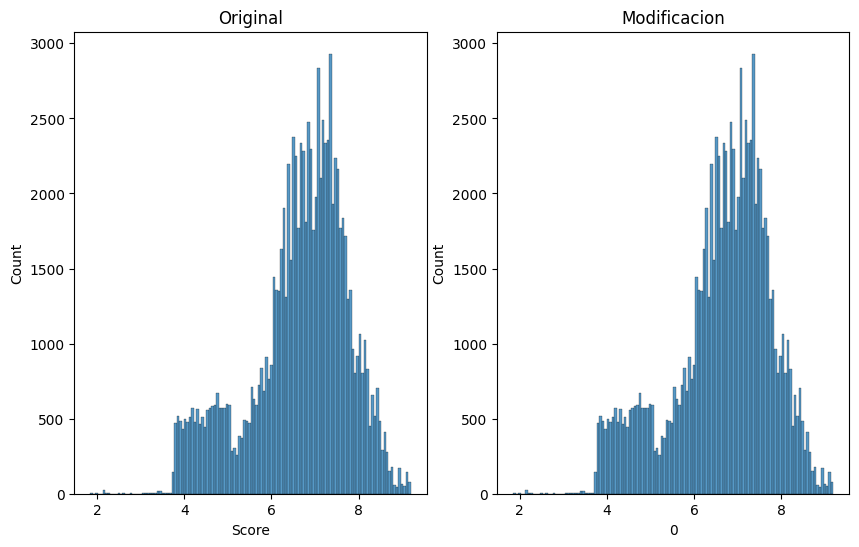

In [221]:
#Imputación multiple para la primera linea
mice_impute = IterativeImputer()
Data = mice_impute.fit_transform(bigdata3.drop(['Name'], axis=1))
Data1MI= pd.DataFrame(Data)

# Verificar si cambiamos distribucion
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.histplot(bigdata3['Score'])
plt.title('Original')
plt.subplot(122)
sns.histplot(Data1MI[0])
plt.title('Modificacion')

Text(0.5, 1.0, 'Modificacion')

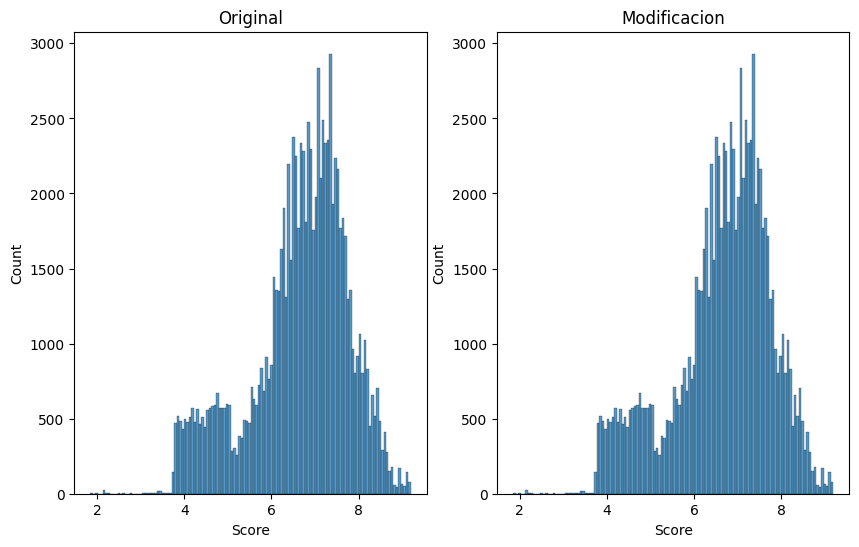

In [222]:
imputer = KNNImputer(n_neighbors= 3).set_output(transform='pandas')
Data1KNN = imputer.fit_transform(bigdata3.drop(['Name'], axis=1))

# Verificar si cambiamos distribucion
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.histplot(bigdata3['Score'])
plt.title('Original')
plt.subplot(122)
sns.histplot(Data1KNN['Score'])
plt.title('Modificacion')

Ambos casos mantuvieron la distribución. Se va a usar el primero.

In [223]:
#Se agregan los nombres correspondientes y los nombres de los animes
Data1MI = Data1MI.rename(columns={0: 'Score',1: 'Ranked',2: 'Popularity',3: 'Rating',4: 'Favorites',5: 'Type',6:'Genres',7:'Producers',8:'Studios'})
Data1MI['Name'] = bigdata3['Name']
Data1MI.tail(2)

Score   Ranked  Popularity  Rating  Favorites  Type  Genres  \
96947  4.193093  14287.0     17563.0     0.0        0.0   5.0     0.0   
96948  4.193093  14287.0     17563.0     0.0        0.0   5.0    12.0   

       Producers  Studios           Name  
96947     1773.0      0.0  Scarlet Nexus  
96948     1773.0      0.0  Scarlet Nexus

In [224]:
#Eliminando los valores no enteros 
for i in range(len(Data1MI)):
    Data1MI['Genres'][i]=math.trunc(Data1MI['Genres'][i])
    Data1MI['Producers'][i]=math.trunc(Data1MI['Producers'][i])
    Data1MI['Studios'][i]=math.trunc(Data1MI['Studios'][i])

In [225]:
#Ya tenemos los nulos resueltos
Data1MI.isnull().sum()

Score         0
Ranked        0
Popularity    0
Rating        0
Favorites     0
Type          0
Genres        0
Producers     0
Studios       0
Name          0
dtype: int64

#### Outliers

Se van a analizar los siguientes modelos para decidir cuál es el más apto a la hora de identificar datos atípicos:  
- Isolation Forest  
- Minimum Covariance Determinant  
- Local Outlier Factor  
- One-Class SVM  

In [226]:
#Preparando dataframe para comparación
modelResultParameters = pd.DataFrame(columns=['Name','MAE','Size','Outliers'])
modelResultParameters['Name'] = ['Original','IsolationForest','MinimumCovarianceDeterminant','LocalOutlierFactor','One-ClassSVM']

Métodos de interes para evitar repetición de código. 

In [227]:
def MAE (column, data, yhat): #Método para filtrar los errores MAE el una vez con el modelo
    #Recibe la columna de interés, el dataframe base y la lista de outliers
    # seleccionar todas las filas que no son outliers
    mask = yhat == -1 # filtro

    filterX=data.copy() #Creando dataframe para guia
    filterX['Pass']=mask #Agregando fila para el filtro
    FilterX=filterX.copy()#Creando dataframe para datos sin outliers
    FilterY=y_train.copy()#Creando dataframe para datos sin outliers
    for index, row in filterX.iterrows(): #por cada fila
        if (row['Pass']): #Si es un outlier
            FilterX = FilterX.drop(index) #Se elimina esa fila
            FilterY = FilterY.drop(index) #Y en el vector objetivo también
    FilterX = FilterX.drop ('Pass', axis = 1) #Se elimina la fila de Pass

    X_train_i, y_train_i = FilterX, FilterY
    # Ajustar modelo
    model = LinearRegression()
    model.fit(X_train_i, y_train_i)
    # evaluar el modelo
    yhat_i = model.predict(X_test)
    # evaluar predicciones
    mae = mean_absolute_error(y_test, yhat_i)
    print(column)
    print('MAE: %.3f' % mae)

    #Agregando a dataframe
    ind = int(modelResultParameters.loc[modelResultParameters['Name'] == column].index[0])
    modelResultParameters['MAE'][ind] = mae

    

In [228]:
def filtrarDataframe (column, data, yhat): #Método para filtrar el dataframe una vez con el modelo
    #Recibe nombre de la columna, dataframe base y array de outliers
    # seleccionar filas que no son outliers
    mask = yhat == -1
    filter=data.copy() #Creando dataframe para guia
    Filtered=filter.copy()#Creando dataframe para datos sin outliers
    filter['Pass']=mask #Agregando fila para el filtro
    for index, row in filter.iterrows(): #por cada fila
        if (row['Pass']): #Si es un outlier
            Filtered = Filtered.drop(index) #Se elimina esa fila

    #Agregando a dataframe 
    ind = int(modelResultParameters.loc[modelResultParameters['Name'] == column].index[0])
    modelResultParameters['Size'][ind] = len(Filtered)
    modelResultParameters['Outliers'][ind] = list(mask).count(True)
    return Filtered #Retorna el dataframe filtrado

##### Primera linea

In [229]:
#Separar en X y y
x, y = Data1MI.drop(['Name','Score'], axis=1),Data1MI['Score']
# separar en train y test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

# ajustar modelo
model = LinearRegression()
model.fit(X_train, y_train)
# obtener predicciones
yhat = model.predict(X_test)
# evaluar predicciones
mae = mean_absolute_error(y_test, yhat)
print("Error sin haber considerado atípicos:")
print('MAE: %.3f' % mae)

Error sin haber considerado atípicos:
MAE: 0.102


In [230]:
#Se prepara el dataframe para exponer los parametros
ind = int(modelResultParameters.loc[modelResultParameters['Name'] == 'Original'].index[0])
modelResultParameters['MAE'][ind] = mae
modelResultParameters['Size'][ind] = len(Data1MI)
modelResultParameters['Outliers'][ind] = 0

In [231]:
#LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20,algorithm='auto',metric='minkowski')
yhat = lof.fit_predict(X_train)
MAE('LocalOutlierFactor', X_train, yhat)

# IsolationForest
iso = IsolationForest(contamination=0.1) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(X_train)
MAE('IsolationForest', X_train, yhat)

#One-ClassSVM
ee = OneClassSVM(nu=0.1) # nu proporcion de outliers
yhat = ee.fit_predict(X_train)
MAE('One-ClassSVM', X_train, yhat)

#MinimumCovarianceDeterminant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(X_train)
MAE('MinimumCovarianceDeterminant', X_train, yhat)

LocalOutlierFactor
MAE: 0.101
IsolationForest
MAE: 0.103
One-ClassSVM
MAE: 0.108
MinimumCovarianceDeterminant
MAE: 0.127


Ahora se van a aplicar al los datos. 

In [232]:
#LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20,algorithm='auto',metric='minkowski')
yhat = lof.fit_predict(Data1MI.drop(['Name'], axis=1))
FilteredLOF = filtrarDataframe('LocalOutlierFactor', Data1MI, yhat)

# IsolationForest
iso = IsolationForest(contamination=0.1) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(Data1MI.drop(['Name'], axis=1))
FilteredIF = filtrarDataframe('IsolationForest', Data1MI, yhat)

#One-ClassSVM
ee = OneClassSVM(nu=0.1) # nu proporcion de outliers
yhat = ee.fit_predict(Data1MI.drop(['Name'], axis=1))
FilteredOCS = filtrarDataframe('One-ClassSVM', Data1MI, yhat)

#MinimumCovarianceDeterminant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(Data1MI.drop(['Name'], axis=1))
FilteredMCD = filtrarDataframe('MinimumCovarianceDeterminant', Data1MI, yhat)

In [233]:
modelResultParametersPrimeraLinea = modelResultParameters.copy()
modelResultParametersPrimeraLinea

Name       MAE   Size Outliers
0                      Original  0.101559  96949        0
1               IsolationForest  0.102699  87254     9695
2  MinimumCovarianceDeterminant  0.126806  87254     9695
3            LocalOutlierFactor  0.101192  91182     5767
4                  One-ClassSVM  0.107944  87256     9693

##### Segunda linea

In [234]:
#Separar en X y y
x, y = data2f.drop(['Name','Score'], axis=1),data2f['Score']
# separar en train y test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [235]:
# ajustar modelo
model = LinearRegression()
model.fit(X_train, y_train)
# obtener predicciones
yhat = model.predict(X_test)
# evaluar predicciones
mae = mean_absolute_error(y_test, yhat)
print("Error sin haber considerado atípicos:")
print('MAE: %.3f' % mae)

Error sin haber considerado atípicos:
MAE: 0.625


In [236]:
ind = int(modelResultParameters.loc[modelResultParameters['Name'] == 'Original'].index[0])
modelResultParameters['MAE'][ind] = mae
modelResultParameters['Size'][ind] = len(data2f)
modelResultParameters['Outliers'][ind] = 0

In [237]:
#LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20,algorithm='auto',metric='minkowski')
yhat = lof.fit_predict(X_train)
MAE('LocalOutlierFactor', X_train, yhat)

# IsolationForest
iso = IsolationForest(contamination=0.1) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(X_train)
MAE('IsolationForest', X_train, yhat)

#One-ClassSVM
ee = OneClassSVM(nu=0.1) # nu proporcion de outliers
yhat = ee.fit_predict(X_train)
MAE('One-ClassSVM', X_train, yhat)

#MinimumCovarianceDeterminant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(X_train)
MAE('MinimumCovarianceDeterminant', X_train, yhat)

LocalOutlierFactor
MAE: 0.622
IsolationForest
MAE: 1.078
One-ClassSVM
MAE: 0.921
MinimumCovarianceDeterminant
MAE: 1.066


In [238]:
#LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20,algorithm='auto',metric='minkowski')
yhat = lof.fit_predict(data2f.drop(['Name'], axis=1))
FilteredLOF2 = filtrarDataframe('LocalOutlierFactor', data2f, yhat)

# IsolationForest
iso = IsolationForest(contamination=0.1) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(data2f.drop(['Name'], axis=1))
FilteredIF2 = filtrarDataframe('IsolationForest', data2f, yhat)

#One-ClassSVM
ee = OneClassSVM(nu=0.1) # nu proporcion de outliers
yhat = ee.fit_predict(data2f.drop(['Name'], axis=1))
FilteredOCS2 = filtrarDataframe('One-ClassSVM', data2f, yhat)

#MinimumCovarianceDeterminant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(data2f.drop(['Name'], axis=1))
FilteredMCD2 = filtrarDataframe('MinimumCovarianceDeterminant', data2f, yhat)

In [239]:
modelResultParametersSegundaLinea = modelResultParameters.copy()
modelResultParametersSegundaLinea

Name       MAE   Size Outliers
0                      Original  0.625159  17562        0
1               IsolationForest  1.078208  15805     1757
2  MinimumCovarianceDeterminant  1.065847  15805     1757
3            LocalOutlierFactor   0.62163  16721      841
4                  One-ClassSVM  0.920521  15805     1757

#### Análisis

In [240]:
print('Primera linea')
print(modelResultParametersPrimeraLinea)
print('Segunda linea')
print(modelResultParametersSegundaLinea)

Primera linea
                           Name       MAE   Size Outliers
0                      Original  0.101559  96949        0
1               IsolationForest  0.102699  87254     9695
2  MinimumCovarianceDeterminant  0.126806  87254     9695
3            LocalOutlierFactor  0.101192  91182     5767
4                  One-ClassSVM  0.107944  87256     9693
Segunda linea
                           Name       MAE   Size Outliers
0                      Original  0.625159  17562        0
1               IsolationForest  1.078208  15805     1757
2  MinimumCovarianceDeterminant  1.065847  15805     1757
3            LocalOutlierFactor   0.62163  16721      841
4                  One-ClassSVM  0.920521  15805     1757


Para ambos casos, el método Local Outlier Factor mostró un valor menor de error para ambos datos. Una vez filtrados los datos usando cada uno de los modelos planteados, LocalOutlierFactor identificó la mayor cantidad de atípicos para la primera linea, pero la menor cantidad de atípicos para la segunda. Esa diferencia se puede deber a la efectividad del método para casos multivariados como presentados en el actual. 

Se puede concluir que para ambos casos, el método de LocalOutlierFactor es el más indicado para identificar datos atípicos.

### 5. Modelo de machine learning

#### Primera linea

Para el caso de la primera linea, se quiere visualizar que tan influyente son las variables de **Genres, Producers y Studios** para la generación del Score. Para esto, se va a usar el método de regresión OLS.

In [349]:
#Dataframe a usar ya sin nulos y sin outliers
FilteredLOF.head(2)

Score  Ranked  Popularity  Rating  Favorites  Type  Genres  Producers  \
0   8.78    28.0        39.0     3.0    61971.0   5.0     0.0        0.0   
1   8.78    28.0        39.0     3.0    61971.0   5.0     1.0        0.0   

   Studios          Name  
0      0.0  Cowboy Bebop  
1      0.0  Cowboy Bebop

In [ ]:
#Para mayor claridad, se vuelven las variables categoricas. 
#Pasar de número a categoría
def ratingToCategories(number):
    text = ''
    if number == 0:
        text = 'G - All Ages'
    elif number == 1:
        text = 'PG - Children'
    elif number == 2:
        text = 'PG-13 - Teens 13 or older'
    elif number == 3:
        text = 'R - 17+ (violence & profanity)'
    elif number == 4:
        text = 'R+ - Mild Nudity'
    elif number == 5:
        text = 'Rx - Hentai'
    else:
        text = 'Desconocido'
    return text

def typeToCategories(number):
    text = ''
    if number == 0:
        text = 'Music'
    elif number == 1:
        text = 'Special'
    elif number == 2:
        text = 'OVA'
    elif number == 3:
        text = 'Movie'
    elif number == 4:
        text = 'ONA'
    elif number == 5:
        text = 'TV'
    else:
        text = 'Desconocido'
    return text

#Conversión
ML1 = FilteredLOF.copy() #Dataframe a modificar
for index, row in FilteredLOF.iterrows():
        ML1['Producers'][index] = producerdf['Producer'][int(row['Producers'])]
        ML1['Genres'][index] = genredf['Genre'][int(row['Genres'])]
        ML1['Studios'][index] = studiodf['Studio'][int(row['Studios'])]
        ML1['Rating'][index] = ratingToCategories(int(row['Rating']))
        ML1['Type'][index] = typeToCategories(int(row['Type']))

In [357]:
#Preparación para modelado
print('----------------------')
print('Media de cada variable')
print('----------------------')
ML1.mean(axis=1)

----------------------
Media de cada variable
----------------------


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
#Preparación para modelado
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
ML1.var(axis=0)

In [325]:
for index, row in FilteredLOF.iterrows():
        print(row['Producers'])
        print(producerdf['Producer'][int(row['Producers'])])
        print('Next')

0.0
Bandai Visual
Next
0.0
Bandai Visual
Next
0.0
Bandai Visual
Next
0.0
Bandai Visual
Next
0.0
Bandai Visual
Next
0.0
Bandai Visual
Next
1.0
Sunrise
Next
1.0
Sunrise
Next
1.0
Sunrise
Next
1.0
Sunrise
Next
1.0
Sunrise
Next
2.0
 Bandai Visual
Next
2.0
 Bandai Visual
Next
2.0
 Bandai Visual
Next
2.0
 Bandai Visual
Next
2.0
 Bandai Visual
Next
4.0
TV Tokyo
Next
4.0
TV Tokyo
Next
4.0
TV Tokyo
Next
4.0
TV Tokyo
Next
4.0
TV Tokyo
Next
4.0
TV Tokyo
Next
2.0
 Bandai Visual
Next
2.0
 Bandai Visual
Next
2.0
 Bandai Visual
Next
2.0
 Bandai Visual
Next
2.0
 Bandai Visual
Next
2.0
 Bandai Visual
Next
5.0
 Dentsu
Next
5.0
 Dentsu
Next
5.0
 Dentsu
Next
5.0
 Dentsu
Next
5.0
 Dentsu
Next
5.0
 Dentsu
Next
6.0
 Victor Entertainment
Next
6.0
 Victor Entertainment
Next
6.0
 Victor Entertainment
Next
6.0
 Victor Entertainment
Next
6.0
 Victor Entertainment
Next
6.0
 Victor Entertainment
Next
4.0
TV Tokyo
Next
4.0
TV Tokyo
Next
4.0
TV Tokyo
Next
4.0
TV Tokyo
Next
5.0
 Dentsu
Next
5.0
 Dentsu
Next
5.0
 Dentsu

#### Segunda linea

In [444]:
#Dataframe a usar ya sin nulos y sin outliers
FilteredLOF2.head(2)

Score  Duration  Episodes  Watching  Completed  On-Hold  Dropped  \
0   8.78     624.0      26.0  105808.0   718161.0  71513.0  26678.0   
1   8.39     115.0       1.0    4143.0   208333.0   1935.0    770.0   

                              Name  
0                     Cowboy Bebop  
1  Cowboy Bebop: Tengoku no Tobira

In [445]:
#Preparación para modelado
print('----------------------')
print('Media de cada variable')
print('----------------------')
FilteredLOF2.drop(['Name'], axis=1).mean(axis=0)

----------------------
Media de cada variable
----------------------


Score            6.265827
Duration       174.114467
Episodes         8.913701
Watching      1683.125650
Completed    21557.620118
On-Hold        857.288619
Dropped       1054.567131
dtype: float64

In [446]:
#Preparación para modelado
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
FilteredLOF2.drop(['Name'], axis=1).var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Score        7.215894e-01
Duration     1.149527e+05
Episodes     3.251193e+02
Watching     4.518635e+07
Completed    6.553562e+09
On-Hold      1.075984e+07
Dropped      1.308545e+07
dtype: float64

In [447]:
#Normalizar y extraer el modelo
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(FilteredLOF2.drop(['Name'], axis=1))

#Modelo PCA
modelo_pca = pca_pipe.named_steps['pca']
# Se combierte el array a dataframe para añadir nombres a los ejes.
ML2=pd.DataFrame(
    data    = modelo_pca.components_,
    columns = FilteredLOF2.drop(['Name'], axis=1).columns)
ML2

Score  Duration  Episodes  Watching  Completed   On-Hold   Dropped
0  0.272188  0.214960  0.179298  0.465944   0.444577  0.474338  0.455860
1  0.121385  0.654981  0.671225 -0.176291  -0.197312 -0.136581 -0.130601
2  0.942666 -0.086934 -0.180248 -0.113503   0.004903 -0.131716 -0.202678
3 -0.120088 -0.017623  0.131687  0.193813   0.721905 -0.293744 -0.568269
4  0.020658 -0.110004  0.096494  0.645173  -0.468899  0.293442 -0.505903
5 -0.080267  0.709873 -0.676467  0.090181  -0.000378  0.036252 -0.150275
6 -0.035636 -0.030043  0.023645 -0.526298   0.149603  0.751859 -0.364151

In [448]:
#En porcentaje para mayor comprensión
ML2P = ((ML2+1)/2)*100
ML2P

Score   Duration   Episodes   Watching  Completed    On-Hold    Dropped
0  63.609388  60.748002  58.964919  73.297220  72.228850  73.716914  72.793003
1  56.069233  82.749073  83.561259  41.185427  40.134378  43.170967  43.469945
2  97.133294  45.653307  40.987602  44.324865  50.245161  43.414206  39.866115
3  43.995581  49.118841  56.584374  59.690674  86.095270  35.312796  21.586537
4  51.032884  44.499795  54.824681  82.258670  26.555044  64.672079  24.704828
5  45.986669  85.493659  16.176641  54.509035  49.981116  51.812610  42.486249
6  48.218186  48.497861  51.182228  23.685111  57.480160  87.592954  31.792455

<Axes: >

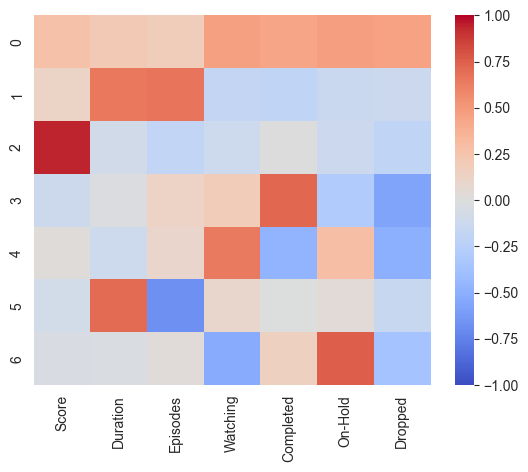

In [449]:
sns.heatmap(ML2,cmap='coolwarm', vmin=-1, vmax=1)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.55486502 0.24912569 0.1096293  0.03593667 0.02045964 0.01834651
 0.01163716]


Text(0, 0.5, 'Por. varianza explicada')

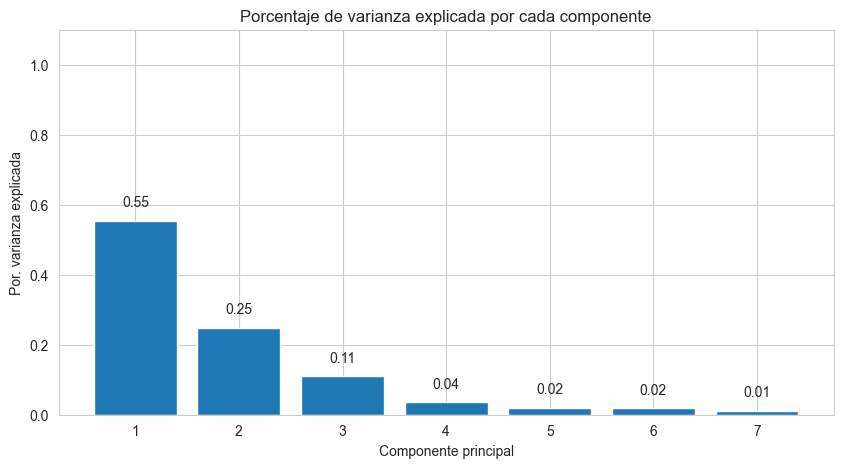

In [450]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)
# texto
for x, y in zip(np.arange(len(ML2.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.55486502 0.80399072 0.91362002 0.94955669 0.97001633 0.98836284
 1.        ]


Text(0, 0.5, 'Por. varianza acumulada')

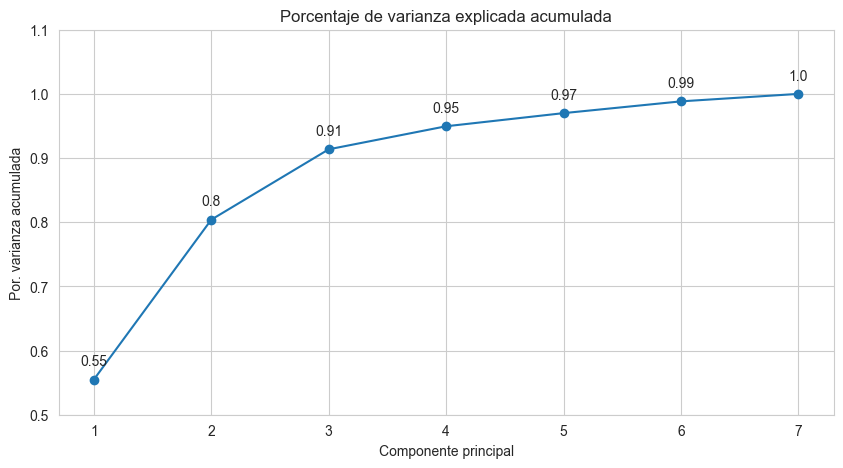

In [452]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(
    np.arange(len(ML2.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(ML2.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0.5, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

**Análisis**  
A partir del mapa de calor y el dataframe de porcentajes se puede observar el comportamiento de las variables principales. Siendo que...  
Para el primer componente, se puede observar que la relación entre *Score*, *Duration* y *Episodes* es bastante cercana, siendo ligeramente mayor *Score* y las demás *Watching, Completed, On-Hold, Dropped* tienen una relación más cercana entre sí, pero lejanas en relación con las primeras.  
Para el segundo componente, se puede observar que *Duration y Episodes* tienen una relación cercana, repitiendo este mismo comportamiento para los siguientes componentes a excepción del sexto.  
Hasta el momento, se puede teorizar que *Duration y Episodes* guardan una relación muy cercana. Y dicha relación parece ser una gran influencia para Score.  

En el tercer componente se puede observar mucha independencia de parte de *Score* mientras que las demás variables tienen una relación cercana, pero débil en comparación a Score.  

Para los componentes cuarto, quinto y septimo, mientras la relación entre *Score, Duration y Episodes* se mantiene cercana aunque débil, para las demás variables es bastante caótico.  
En el cuarto componente, se puede ver mayor influencia de *Completed* cuando *Oh-Hold y Dropped* no presentan mucha fuerza. En el quinto componente se ve este mismo comportamiento para las variables *Watching* cuando *Completed y Dropped* son débiles. En el septimo componente se observa cuando *On-Hold* es fuerte, pero *Watching y Dropped* son débiles.  
De esto se puede teorizar que las variables *Watching, Completed, On-Hold y Dropped* tienen su propio comportamiento de forma casi independiente a *Score, Duration y Episodes.*  

En términos más simples, se puede decir que la asignación de un anime en alguna etiqueta *Watching, Completed, On-Hold y Dropped* es casi irrelevante frente a la puntuación o a su caracteristicas de duración *(Duration y Episodes)* y dicha compartimentalización de un anime en estás etiquetas tiene su propio comportamiento. Mientras que el puntaje se ve más influenciado por la duración *(Duration)* y la distribución de la misma *(Episodes).*  

A partir del porcentaje de varianza explicada y el porcentaje de varianza acumulada explicada, el análisis anterior cobra fuerza. Se puede observar como las variables *Score, Duration y Episodes* son aquellas que más relevancia tienen en el conjunto de datos presentado. Entre las tres variables se llevan el 91% de los datos, siendo solo suficiente estas para entender el comportamiento de los datos en su gran mayoría. Mientras tanto, las variables *Watching, Completed, On-Hold y Dropped* son casi irrelevantes para los datos.  

Luego entonces, se puede concluir que las variables más relevantes son *Score, Duration y Episodes*.  

**¿Y si ahora lo hacemos sin la variable de interés *Score* para ver las relaciones entre las variables?**

<Axes: >

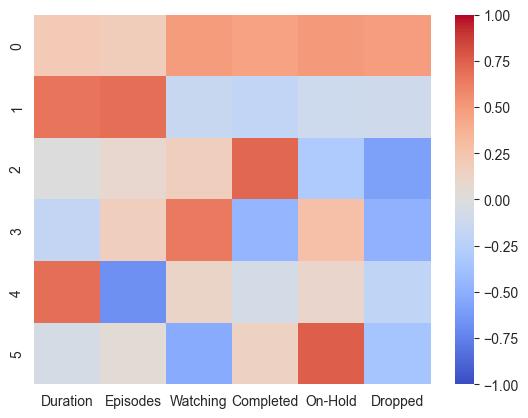

In [460]:
#Normalizar y extraer el modelo
pca_pipe.fit(FilteredLOF2.drop(['Name','Score'], axis=1)) #Esta vez sin incluir el Score
#Modelo PCA
modelo_pca = pca_pipe.named_steps['pca']
# Se convierte el array a dataframe para añadir nombres a los ejes.
ML2SC=pd.DataFrame(
    data    = modelo_pca.components_,
    columns = FilteredLOF2.drop(['Name','Score'], axis=1).columns)
#En porcentaje para mayor comprensión
ML2PSC = ((ML2SC+1)/2)*100

sns.heatmap(ML2SC,cmap='coolwarm', vmin=-1, vmax=1)


In [461]:
ML2PSC

Duration   Episodes   Watching  Completed    On-Hold    Dropped
0  60.448283  58.833170  74.369597  73.038622  74.765552  73.975416
1  83.441236  84.433187  42.396469  41.013544  44.423192  44.864971
2  50.353516  54.132962  58.375122  86.237255  35.105264  20.374687
3  41.204488  58.328843  82.263706  27.301258  63.898746  25.425327
4  84.438504  16.164375  55.831281  46.154375  54.886811  40.178272
5  46.996574  52.242813  23.481784  56.730908  87.638510  32.089922

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.60900699 0.28793593 0.04332215 0.02393187 0.02209044 0.01371261]


Text(0, 0.5, 'Por. varianza explicada')

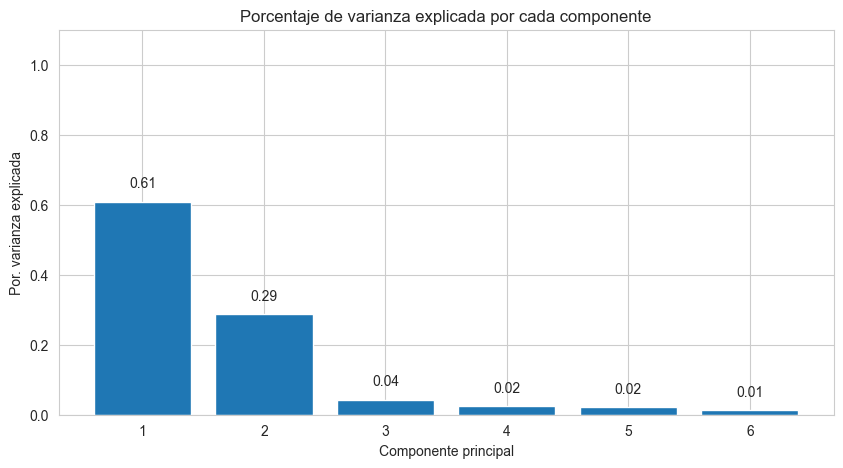

In [462]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)
# texto
for x, y in zip(np.arange(len(ML2SC.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.60900699 0.89694292 0.94026507 0.96419695 0.98628739 1.        ]


Text(0, 0.5, 'Por. varianza acumulada')

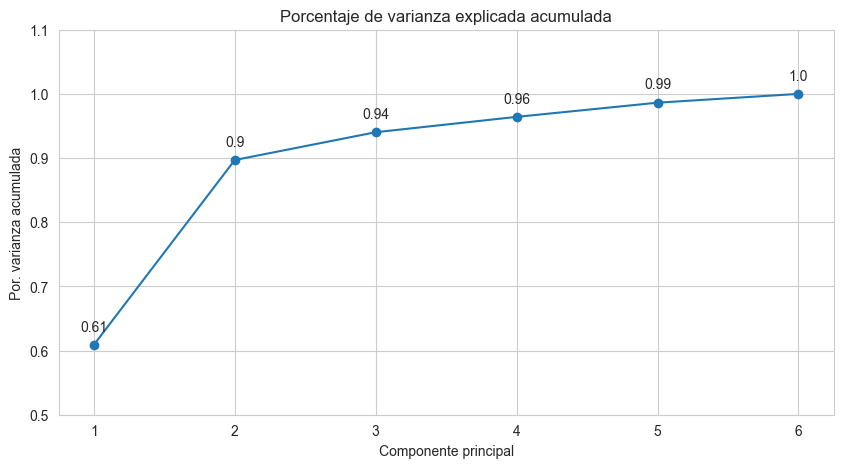

In [463]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(
    np.arange(len(ML2SC.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(ML2SC.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0.5, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

**Análisis**  
A partir del mapa de calor y el dataframe de porcentajes se puede observar que el comportamiento de las variables principales no tuvo mucha varianza. 
Entre las diferencias que se puede visualizar se encuentra que la ausencia de la variable *Score* nos acerca más al comportamiento de las demás variables, tal que ahora se puede ver claramente la relación entre *Duration y Episodes* con *Watching, Completed, On-Hold y Dropped* siendo aún más notable la independencia de ellas. 
La relación entre *Duration y Episodes* es fuerte, mientras que la relación entre *Watching, Completed, On-Hold y Dropped* es fuerte, pero variable según el comportamiento de cada uno. 

A partir del porcentaje de varianza explicada y el porcentaje de varianza acumulada explicada, el análisis anterior se termina de confirmar. Aún con la ausencia de la variable *Score*, se puede observar que *Duration y Episodes* se llevan la mayoría de la influencia sobre el comportamiento del conjunto de datos entregado, siendo ahora del 90%. Mientras tanto, la influencia de las variables *Watching, Completed, On-Hold y Dropped* sigue porcentualmente baja. 

Se concluye entonces que las variables de interés para la influencia sobre el conjunto de datos según los datos escogidos y procesados, son *Duration* y *Episodes* 

### 6. Conclusiones finales

## Borrador

<Axes: >

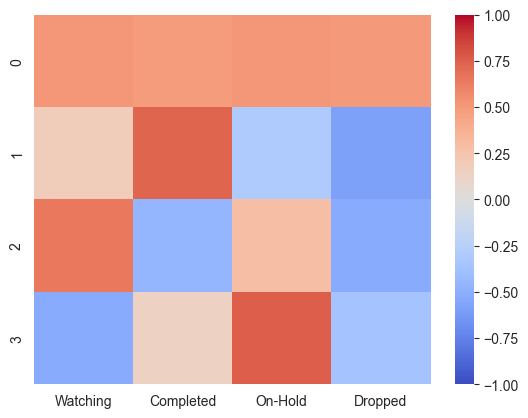

In [459]:
#Normalizar y extraer el modelo
pca_pipe.fit(FilteredLOF2.drop(['Name','Score','Duration','Episodes'], axis=1)) #Esta vez sin incluir el Score
#Modelo PCA
modelo_pca = pca_pipe.named_steps['pca']
# Se convierte el array a dataframe para añadir nombres a los ejes.
ML2SC=pd.DataFrame(
    data    = modelo_pca.components_,
    columns = FilteredLOF2.drop(['Name','Score','Duration','Episodes'], axis=1).columns)
#En porcentaje para mayor comprensión
ML2PSC = ((ML2SC+1)/2)*100

sns.heatmap(ML2SC,cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

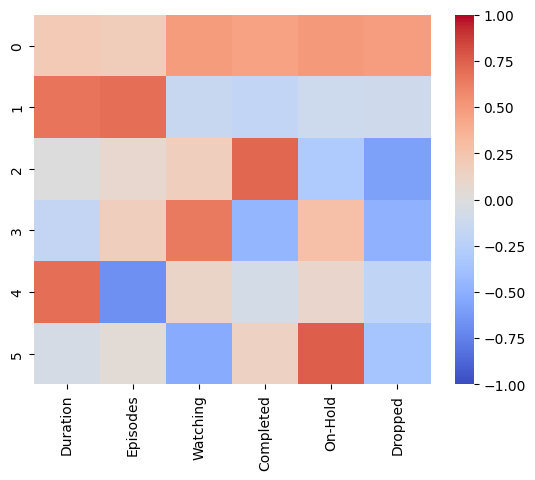

In [413]:
#Normalizar y extraer el modelo
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(FilteredLOF2.drop(['Name','Score'], axis=1))


#Modelo PCA
modelo_pca = pca_pipe.named_steps['pca']
# Se combierte el array a dataframe para añadir nombres a los ejes.
ML2asd=pd.DataFrame(
    data    = modelo_pca.components_,
    columns = FilteredLOF2.drop(['Name','Score'], axis=1).columns)

#En porcentaje para mayor comprensión
ML2Pasd = ((ML2asd+1)/2)*100

sns.heatmap(ML2asd,cmap='coolwarm', vmin=-1, vmax=1)


<BarContainer object of 6 artists>

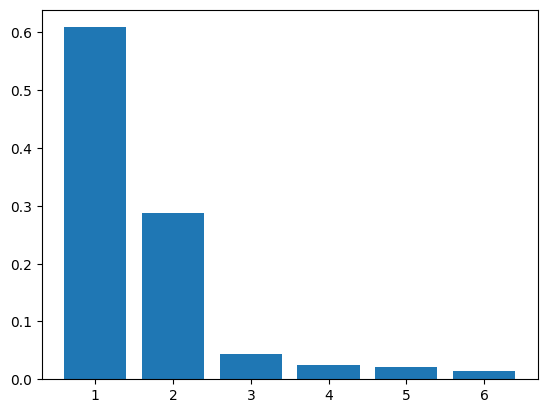

In [414]:
plt.bar(x=np.arange(len(ML2Pasd.columns)) + 1,height=modelo_pca.explained_variance_ratio_)

In [415]:
ML2Pasd

Duration   Episodes   Watching  Completed    On-Hold    Dropped
0  60.448283  58.833170  74.369597  73.038622  74.765552  73.975416
1  83.441236  84.433187  42.396469  41.013544  44.423192  44.864971
2  50.353516  54.132962  58.375122  86.237255  35.105264  20.374687
3  41.204488  58.328843  82.263706  27.301258  63.898746  25.425327
4  84.438504  16.164375  55.831281  46.154375  54.886811  40.178272
5  46.996574  52.242813  23.481784  56.730908  87.638510  32.089922

In [ ]:
for index, row in FilteredLOF.iterrows(): 
    if (row['Studios']) == 50: 
        print(row['Name'])

In [310]:
#no se como se usa esto 
df = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'L': ['B0', 'B1', 'B2', 'B3']})
df

A   L
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3

asdasdasdasdasdasdasd

In [311]:
#no se como se usa esto 
df = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'L': ['B0', 'B1', 'B2', 'B3']})
df

A   L
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3

In [312]:
df2 = pd.DataFrame({'A': ['C0', 'C1', 'C2', 'C3'], 
                    'L': ['D0', 'D1', 'D2', 'D3']})
df2

A   L
0  C0  D0
1  C1  D1
2  C2  D2
3  C3  D3

In [313]:
df3 = pd.DataFrame(columns=['A','B','C','D'])
df3

Empty DataFrame
Columns: [A, B, C, D]
Index: []

In [314]:
df3 = pd.concat([df3, pd.DataFrame([{'C' : df['A'][0],'A':df2['A'][0] },{'C':df2['L'][0]}])], ignore_index=True) #Se agrega
df3

A    B   C    D
0   C0  NaN  A0  NaN
1  NaN  NaN  D0  NaN

In [315]:
df3 = pd.concat([df3, pd.DataFrame(df2)], ignore_index=True)
df3 = pd.concat([df3, pd.DataFrame(df)], ignore_index=True)
df3

A    B    C    D    L
0   C0  NaN   A0  NaN  NaN
1  NaN  NaN   D0  NaN  NaN
2   C0  NaN  NaN  NaN   D0
3   C1  NaN  NaN  NaN   D1
4   C2  NaN  NaN  NaN   D2
5   C3  NaN  NaN  NaN   D3
6   A0  NaN  NaN  NaN   B0
7   A1  NaN  NaN  NaN   B1
8   A2  NaN  NaN  NaN   B2
9   A3  NaN  NaN  NaN   B3

In [316]:
#Calcular la ultramétrica

#no se como se usa esto 
df = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'L': ['B0', 'B1', 'B2', 'B3']})
df

A   L
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3

In [317]:
#Calcular la ultramétrica


In [318]:
#no se como se usa esto 
df = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'L': ['B0', 'B1', 'B2', 'B3']})
df

A   L
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3

In [319]:
tabla.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [320]:
tabla['Favorites']

0        61971
1         1174
2        12944
3          587
4           18
         ...  
17557        6
17558       70
17559       48
17560        2
17561        0
Name: Favorites, Length: 17562, dtype: int64

In [321]:
X_train, X_test, y_train, y_test = train_test_split(data2.drop(["Name",'Score'], axis=1),data2['Score'],test_size=0.3,random_state=0)
imputer = KNNImputer(n_neighbors=5,weights="distance").set_output(transform='pandas')
imputer.fit(X_train)
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_t, y_train)
y_pred = knn.predict(X_test_t)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

NameError: name 'neighbors' is not defined